<a href="https://colab.research.google.com/github/joyjitroy/Machine_Learning/blob/main/Classification/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user
#!pip install uszipcode

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Import Libraries for data visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter  # Import FuncFormatter
import seaborn as sns

# Import Libery to display data in Table format
from tabulate import tabulate

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Import Library to split data
# Import Library to tune different models
from sklearn.model_selection import train_test_split, GridSearchCV

# Import Library to build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics, tree

# Import Library to get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    classification_report,
    confusion_matrix,
    make_scorer,
)

# Import Library to provide informative messages to users without interrupting the flow of the program
# Warnings are typically used to alert users of potential problems,
# such as deprecated features or unexpected runtime conditions
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [ ]:
# Mount google drive to Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the Data from excel into a dataset
folder = '/content/drive/MyDrive/AI_ML/Projects/Machine Learning/'
file = 'orders.csv'
df = pd.read_csv(folder + file)

In [ ]:
# copying data to another variable to avoid any changes to original data
data = df.copy()

## Data Overview

* Observations
* Sanity checks

### View the first and last 5 rows of the dataset

In [ ]:
# returns the first 5 rows from dataset
data.head()

Weeks  Order_Count  Sales_Amount
0  W1[10/22/2023 - 10/28/2023]            3       1318.99
1   W2[10/29/2023 - 11/4/2023]            1        685.64
2   W3[11/5/2023 - 11/11/2023]            1         72.93
3  W4[11/12/2023 - 11/18/2023]            3        366.76
4  W5[11/19/2023 - 11/25/2023]            1        115.24

In [ ]:
# returns the last 5 rows from dataset
data.tail()

Weeks  Order_Count  Sales_Amount
26  W27[4/21/2024 - 4/27/2024]           27      43647.97
27   W28[4/28/2024 - 5/4/2024]           28      22406.42
28   W29[5/5/2024 - 5/11/2024]           29      51186.91
29  W30[5/12/2024 - 5/18/2024]           43      55083.91
30  w31[5/19/2024 - 5/21/2024]           13       9653.26

### Understand the shape of the dataset

In [ ]:
# Check the number of rows and columns in the Dataset Shape
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 31 rows and 3 columns.


In [ ]:
# Print a concise summary of the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weeks         31 non-null     object 
 1   Order_Count   31 non-null     int64  
 2   Sales_Amount  31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


* **Observations**:
 - The Dataframe has 5000 Rowes and 14 Columns
 - out of 14 datatype of only one column (CCAvg) is an Integer column. The datatype of the remaining 13 columns is Float.

### Sanity Check of the Data

In [ ]:
# Check presence of missing, NaN or negative value in the dataset
pd.DataFrame({
    'Missing_Counts': data.isnull().sum(),  # Check for missing values in the Dataset
    'NaN_Counts': data.isna().sum(),        # Check for NaN (Not an Number) values in the Dataset
    'Has_Negative': (data < 0).any(),       # Check for negative values in the Dataset
})

TypeError: '<' not supported between instances of 'str' and 'int'

In [ ]:
# Check for duplicate values in the Dataset
data.duplicated().sum() # agreegating the duplicate values of a dataset

0

**Observation**:
 - The dataset has no Missing, NaN (Not a Number) Value.
 - The Dataset has no duplicates valur as well.
 - The experience column has Negative number.

### Statistical summary

In [ ]:
# Pribt statistical summary of the data using describe() method
data.describe().T

count          mean           std    min       25%       50%  \
Order_Count    31.0     13.838710     12.659902   1.00     3.000     10.00   
Sales_Amount   31.0  36225.894516  69353.692140  72.93  1225.035  18009.56   

                  75%        max  
Order_Count      24.5      44.00  
Sales_Amount  42843.3  380108.84

## Data preprosessing before EDA

### Dropping Columns

* The `ID` column contains only unique values, so we can drop it

In [ ]:
# Drop the ID Column
try:
  data = data.drop(['ID'], axis=1)
  print("ID column dropped successfully.")
except KeyError:
  print(f"Column ID must already be dropped.")

ID column dropped successfully.


### Checking for Anomalous Values

In [ ]:
# Given that the 'Experience' field has negative numbers, it's important to verify the uniqueness of the values
# Use the unique() method to examine all unique values in the 'Experience' field and identify potential anomalies
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

**Observation**: There are three negative numbers, specifically -1, -2, and -3, in 'Experience' field

In [ ]:
# Additionally, it is necessary to determine the number of customers impacted by the incorrect value
# Utilize the loc[] function to locate entries in the Experience field with negative values
# Apply the value_counts() method to determine the frequency of each negative value

data.loc[data['Experience'] < 0]['Experience'].value_counts()

Experience
-1    33
-2    15
-3     4
Name: count, dtype: int64

**Observation**: We've identified a total of 52 customers with negative professional experience, distributed among the values -1, -2, and -3. It seems that these values mistakenly include a minus sign, and should be replaced by its absolute value

In [ ]:
# Correcting the experience values by replacing the negative value with its absolute value
# use abs() function to get the absolute value. apply lamda function
data['Experience'] = data['Experience'].apply(lambda val: np.abs(val) if val < 0 else val)

### Feature Engineering

In [ ]:
# Check the Statical Summary of zip code
data["ZIPCode"].describe()

count     5000.000000
mean     93169.257000
std       1759.455086
min      90005.000000
25%      91911.000000
50%      93437.000000
75%      94608.000000
max      96651.000000
Name: ZIPCode, dtype: float64

**Observation**: There are 467 unique ZIP codes in the dataset. Due to the **high cardinality** of ZIP code data, which can lead to **Overfitting**, it's crucial to apply feature engineering techniques. Specifically, we will focus on using the first two digits of the ZIP code in the model for the following reasons:

1.   **Regional Insights**: The initial two digits of a zip code often denote a specific geographic region. Incorporating this data into the decision tree model enables capturing regional nuances or variations that can impact the target variable.
2.   **Dimensionality Reduction**: Utilizing only the first two digits of the zip code instead of the entire code, which may be high-dimensional and lead to overfitting, helps reduce dimensionality while retaining significant geographical details.
3. **Interpretability Enhancement**: Decision tree models offer inherent interpretability. Utilizing the first two digits of the zip code as a feature enhances model understandability and facilitates easier interpretation of how regional aspects influence model predictions.


In [ ]:
# library required to convert zipcode to county

from uszipcode import SearchEngine

# User defined function to do the same

def zipcode_to_county(zipc):
  search = SearchEngine()
  try:
    zipcode = search.by_zipcode(zipc)
    return zipcode.county
  except:
    return "Unknown"

In [ ]:
data["County"] = data["ZIPCode"].apply(zipcode_to_county)

In [ ]:
data.County.nunique()

39

In [ ]:

search = SearchEngine()
zip_code = 92634

# Search for the ZIP code
result = search.by_zipcode(zip_code)

# Get the county name
county = result.to_dict()["county"]

print(county)

AttributeError: 'NoneType' object has no attribute 'to_dict'

In [ ]:
try:
  data["County"] = data["ZIPCode"].apply(zipcode_to_county)
  print("County column added successfully.")
except AttributeError:
  print(f"Column County must already be added.")

Column County must already be added.


In [ ]:
from uszipcode import SearchEngine

# Initialize the search engine
search = SearchEngine()

# Example ZIP codes
for zip_code in data["ZIPCode"]:
  try:
    # Search for the ZIP code
    result = search.by_zipcode(zip_code)

    # Get the county name
    county = result.to_dict()["county"]

    #print(f"The county for ZIP code {zip_code} is {county}")
  except Exception as e:
    print(f"Error occurred while processing ZIP code {zip_code}: {e}")

In [ ]:
# Determine the count of distinct values after reducing the ZIP Code to its first two digits dimensionally
# Start by converting the numerical 'ZipCode' column to a string using the astype() method
# Next, apply the str() function to extract the first two characters, forming a region group code
# Finally, establish a new array called 'Region_Group_Code' to store the initial two digits of 'ZIPCode'

Region_Group_Code = data["ZIPCode"].astype(str).str[0:2]

print("Number of unique values if we group the ZIP code but first two digits: ", Region_Group_Code.unique())

Number of unique values if we group the ZIP code but first two digits:  ['91' '90' '94' '92' '93' '95' '96']


In [ ]:
# Utilize the value_counts() function to determine the count of unique Zip codes present within the new Region Group codes
Region_Group_Code.value_counts()

ZIPCode
94    1472
92     988
95     815
90     703
91     565
93     417
96      40
Name: count, dtype: int64

Observation: Transforming the distribution of ZIP codes into new region group codes can aid in mitigating overfitting in our model

In [ ]:
# Replace the existing 'ZIPCode' Column by the new 'Region_Group_Code
data["ZIPCode"] = Region_Group_Code

## Exploratory Data Analysis (EDA)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Weeks         31 non-null     object 
 1   Order_Count   31 non-null     int64  
 2   Sales_Amount  31 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 872.0+ bytes


- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

**Answer**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
- **Ans**: The distribution of home mortgage amounts is heavily concentrated around $0, indicating that the majority of customers (approximately 3500 out of 5000) have not taken out a home loan.
The Boxplot depicting mortgage amounts also reveals numerous outliers in the upper quartiles, suggesting that a few customers have taken exceptionally high home mortgages.

2. How many customers have credit cards?
- **Ans**: There are two attributes related to credit cards:

 - <u>CCAvg</u>: Average spending on credit cards per month (in thousand dollars).
 - <u>CreditCard</u>: Indicates whether the customer uses a credit card issued by any other bank (excluding All Life Bank) (0: No, 1: Yes).

>>The question doesn't specify which attribute is being referred to.

>>Based on the analysis of the "CCAvg" attribute, it is assumed that 4898 customers hold a credit card, with the condition that zero spending equates to not holding a credit card.

>>Regarding the analysis of the "CreditCard" attribute, it indicates that out of 5000 customers, 1470 hold credit cards from other banks.

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
- **Ans**: The Income attributes shows strong positive correlation with credit card spending and personal loan amount. Higher income is associated with higher credit card spending and a greater tendency to take out personal loans.

4. How does a customer's interest in purchasing a loan vary with their age?
- **Ans**: The age distribution among customers with Personal Loans and without Personal Loans is similar, indicating that interest in Personal Loans is not significantly influenced by age.

5. How does a customer's interest in purchasing a loan vary with their education?
- **Ans**: Customers with higher education levels tend to opt for more Personal Loans, likely due to their higher incomes.

### Define useful functions for improved graphical representations

#### Render a Boxplot and histogram combined

In [ ]:
def histogram_boxplot(data, feature,
                      Title = None,
                      xlabel = None,
                      figsize = (12, 7), fontsize = 15,
                      kde = False,
                      bins = None,
                      boxPlot_Color = None,
                      histPlot_Color = None,
                      hist_palette = "winter",
                      ):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows = 2,          # Number of rows of the subplot grid= 2
        sharex = True,      # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize)

    # Create boxplot with mean indicator, and histogram with mean and median lines
    # boxplot will be created and a star will indicate the mean value of the column
    sns.boxplot( data = data, x = feature, ax = ax_box, showmeans = True, color = boxPlot_Color)  # For Boxplot
    sns.histplot(data = data, x = feature, kde = kde, ax = ax_hist, bins = bins, color = histPlot_Color, palette = hist_palette
    ) if bins else sns.histplot(
        data = data, x = feature, color = histPlot_Color, kde = kde, ax = ax_hist
        )  # For histogram

    ax_hist.axvline(data[feature].mean(), color = "black", linestyle="--")   # Add mean to the histogram
    ax_hist.axvline(data[feature].median(), color = "black", linestyle="-")  # Add median to the histogram
    ax_hist.legend(['Mean', 'Median'])                                       # Add a legend with Mean and Modian

    # Set the Title of the Plot
    # If Title is Not Specified, then create the Title
    # Lambda Function Utilized
    Title = (("Distribution of " + feature) if Title is None else (Title)).replace("_", " ")

    # Assign a Suitable Title to the Plot
    fig.suptitle(Title, fontsize = fontsize, y = 0.95)

    # Set the label of the x column
    ax_hist.set_xlabel(((feature) if xlabel is None else (xlabel)).replace("_", " "),
               fontsize = fontsize)

    plt.show()  # show the plot

#### Render a labeled Barplot

In [ ]:
# function to create labeled barplots
def labeled_barplot(data,             # dataframe
                    feature,          # dataframe column name
                    mapping = {},     # if column represent binary value then map to the actual value
                    perc = False,     # whether to display percentages instead of count (default is False)
                    n = None,         # displays the top n category levels (default is None, i.e., display all levels)
                    Title = None,
                    xlabel = None,
                    palette = "Paired",
                    fontsize = 12, degree = 0):

    total = len(data[feature])      # length of the column
    count = data[feature].nunique() # number of unique values

    # Set the Plot size
    plt.figure(figsize = (count + 1, 5)) if n is None else plt.figure(figsize = (n + 1, 5))

    # Generate the Plot
    ax = sns.countplot(data = data, x = feature, palette = palette,
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    # Set the Label for each bin of the barplot
    for p in ax.patches:
      # Set the Label
      label = "{:.1f}%".format(100 * p.get_height() / total) if perc else p.get_height()

      # Get the x and y position of the label
      x = p.get_x() + p.get_width() / 2   # width of the plot
      y = p.get_height()                  # height of the plot

      # Annotate the Labels
      ax.annotate(label, (x, y), ha = "center", va = "center",
            size = fontsize, xytext = (0, 5), textcoords="offset points",
      )  # annotate the percentage

    # Render the barplot
    plot_styling(data, feature, mapping,
                 Title, "Barplot of ",
                 xlabel, degree = degree,
                 )

    sns.despine(left=True)    # Hide the plot border
    plt.show()                # show the plot

#### Render a Stacked barplot

In [ ]:
# Render a interactive bar chart for Bivariate analysis
def stacked_barplot(data,
                    predictor,              # independent variable
                    target,                 # target variable
                    Title = None,           # Title of the plot
                    xlabel = None,          # x-axis label
                    index_mapping = {},
                    column_mapping = {},
                    kind = 'bar', stacked = True,
                    fontsize = 12, degree = 0,
                    normatized_by_index = True,
                    ):

    # Define useful variables
    count = data[predictor].nunique()               # Return the unique value count of predictor column
    predictor_ = (predictor).replace("_", " ") if xlabel is None else (xlabel)
                                                    # set the label of X axis
    target_ = target.replace("_", " ")              # set the label of Legand

    # Create Plot data by creating a Crosstab with predictor and target column
    plotdata = pd.crosstab(data[predictor], data[target], normalize = "index"
                           ) if normatized_by_index else pd.crosstab(data[predictor], data[target]
                                                                  ).sort_values(by=data[target].value_counts().index[1], ascending=False)

    # Replace index and column values using the rename method
    plotdata.rename(index = index_mapping, columns = column_mapping, inplace=True)

    # Plot the data
    plotdata.plot(kind = kind, stacked = stacked, figsize=(count + 5, 5))

    # If Title is Not Specified, then define the Title
    Title = (predictor_ + " v/s " + target_) if Title is None else (Title)

    plt.title(Title, fontsize = fontsize, y=1.04)                       # Display the Title of the Plot
    plt.xlabel(predictor_, fontsize = fontsize)                         # Display the plot accross X Axis
    plt.xticks(rotation = degree, fontsize = fontsize)                  # Display labels of xticks
    plt.legend(title = target_, loc="upper left", bbox_to_anchor=(1, 1)) # display the Legand

    plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percentage)) if normatized_by_index else None  # Format the y-axis

    sns.despine(top = True, right = True)       # Hide the plot border
    plt.show()                                  # Display the Plot

#### Render a distributions plot and Box plot

In [ ]:
### function to plot distributions with restpect to target

def distribution_plot_wrt_target(data, predictor, target,
                                  Title = None,
                                  xlabel = None,
                                  mapping = None,
                                  ked = False,
                                  hist_stat = "density",
                                  Color = ["teal", "orange"],
                                  figsize=(12, 10),
                                  fontsize = 12, degree = 0,
                                 ):

    # Set up labels text
    predictor_ = (predictor).replace("_", " ") if xlabel is None else (xlabel)
    target_ = target.replace("_", " ")

    # Get all the unique value of Target variable
    target_uniq = sorted(data[target].unique())

    # Map each unique numeric target to its corresponding non-numeric value
    target_val = [mapping.get(item, item) for item in (target_uniq)] if mapping != None else target_uniq

    # Define a 2x2 Subplot
    fig, axs = plt.subplots(2, len(target_uniq), figsize = figsize)

    # Add space between Subplots
    fig.subplots_adjust(hspace=0.3)

    # Render the Histplots
    for i in range(len(target_uniq)):
      # Set title for Histplots
      axs[0, i].set_title("Distribution of " + predictor_ +
                          " when " + target_ + " = " + str(target_val[i]))

      # Plot the Histograms
      sns.histplot(data = data[data[target] == target_uniq[i]],
                x=predictor, kde=ked, ax=axs[0, i], color= Color[i], stat = hist_stat)

      # Set the Lavel of X Axis by replacing Underscores in the Column Name with Spaces
      axs[0, i].set_xlabel(predictor_, fontsize = fontsize)

    # Render the Boxplots
    for i in range(len(target_uniq)):
      # Set title for Boxplot
      axs[1, i].set_title("Boxplot of " + predictor_ +
                          " w.r.t. " + target_ + " = " + str(target_val[i]))

      # plot the Bixplots
      sns.boxplot(data = data[data[target] == target_uniq[i]], x = predictor,
                  ax=axs[1, i], color = Color[i])

      # Set the Lavel of X Axis by replacing Underscores in the Column Name with Spaces
      axs[1, i].set_xlabel(predictor_, fontsize = fontsize)

    # Set a title for the figure object
    fig.suptitle((target_ + " v/s " + predictor_)if Title is None else (Title),
                 fontsize = fontsize, y=0.95)

    plt.show() # Display the Plot

#### Print a table

In [ ]:
# Fuinction to print a table
def print_table(data, predictor, target,
                index_mapping = {},
                column_mapping = {},
                tablefmt ='fancy_grid',
                ):

    # Define useful variables
    sorter = data[target].value_counts().index[-1]  # Returns the least common value in the target column

    # Creater a Crosstab with predictor and target column
    cross_tab = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter)

    # Replace index and column values using the rename method
    cross_tab.rename(index = index_mapping, columns = column_mapping, inplace=True)

    # Define the new index name by combining the column name and index name
    # Additionally, replace any underscores in the new index name with spaces
    table_index_name = (cross_tab.columns.name + "\n" + cross_tab.index.name).replace("_", " ")

    # Set the name of the axis for the index with new name
    cross_tab.rename_axis(table_index_name, axis='index', inplace = True)

    # Print the table
    print(tabulate(cross_tab, headers='keys', tablefmt = tablefmt))


#### Other useful functions

In [ ]:
def plot_styling (  data,
                    feature,
                    mapping = {},
                    Title = None,
                    Title_prefix = "",
                    xlabel = None,
                    fontsize = 12, degree = 0,
                    ):
    # If Title is Not Specified, Set the Title of the Plot
    Title = Title_prefix + ((feature) if Title is None else (Title)).replace("_", " ")

    # Add the Title to the Plot
    plt.title(Title, fontsize = fontsize, y=1.02)

    # if x Axis label is not specified, then
    # Set the x axis label by replacing Underscores in the Column Name with Spaces
    plt.xlabel(((feature) if xlabel is None else (xlabel)).replace("_", " "),
               fontsize = fontsize)

    # map the xticks label
    labels = [mapping.get(x, x) for x in np.sort(data[feature].unique())]

    # Set the xticks labels
    plt.xticks(tuple(range(0, len(labels))),
               labels = labels,
               rotation = degree, fontsize = fontsize # Rotate the x-Axis Label and set the front side
               )

In [ ]:
# Function to format y-axis as percentage
def to_percentage(y, position):
    return f'{100 * y:.0f}%'

### Univariate Analysis

#### Observation on Age

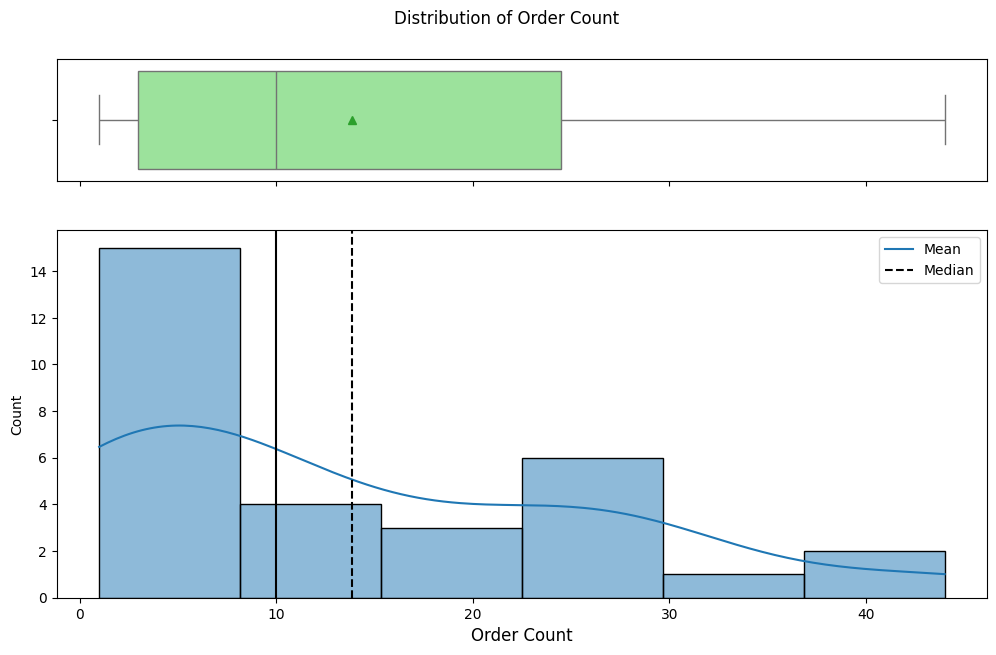

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "Order_Count", fontsize = 12, kde=True, boxPlot_Color = 'lightgreen')

**Observation**:
 - The customer age is uniformly distributed, showing no outliers, with an average Age of around 45 years.
 - The close proximity of the mean and median also suggests a symmetrical distribution.

#### Observations on Experience

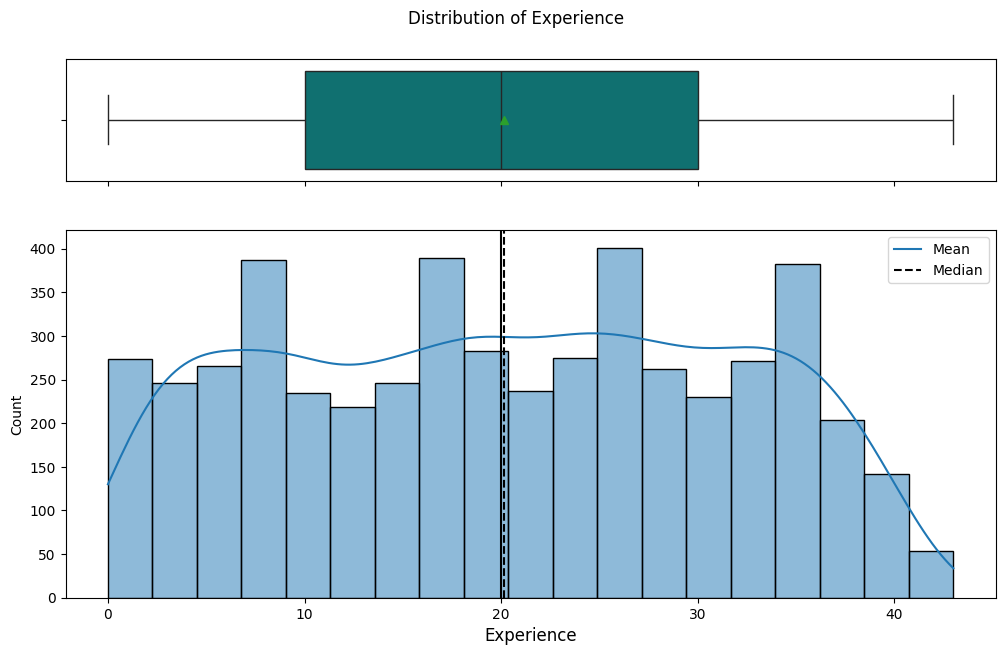

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "Experience", fontsize = 12, kde=True, boxPlot_Color = 'teal')

**Observation**:
 - The professional experience distribution among customers is uniform, with no outliers, and an average Experience close to 20 years.
 - Mean and median are very closed also indicates a symmetrical distribution.

#### Observations on Income

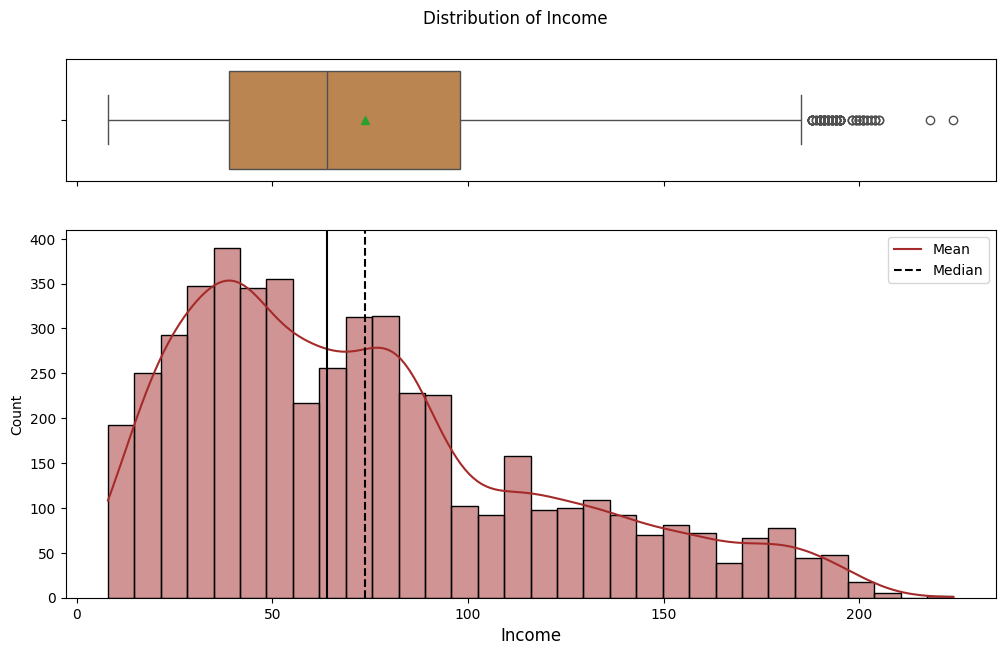

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "Income", fontsize = 12, kde=True, boxPlot_Color = 'peru', histPlot_Color = 'brown')

**Observation**:
 - The income data exhibits right skewness with outliers above the upper whisker.
 - The distribution indicates  there are relatively more customers with lower incomes, and as incomes increase, the number of customers decreases gradually.

#### Observations on Family

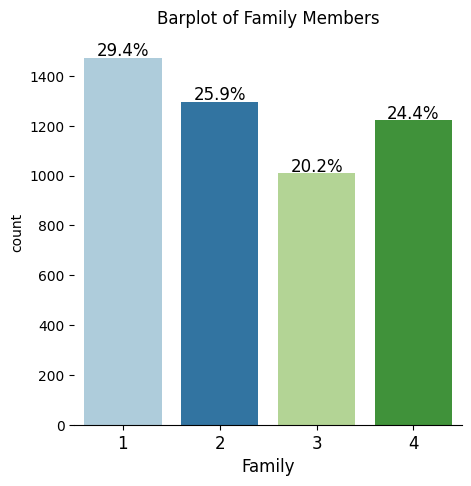

In [ ]:
# Call the Function with Display The labeled barplot
labeled_barplot(data, "Family", perc=True, Title = "Family Members")

**Observation**:
 - The data indicates majority of the customers are from nucelear family.
 - Maximum number of customers (29.4%) are single.

#### Observations on Credit Card Average

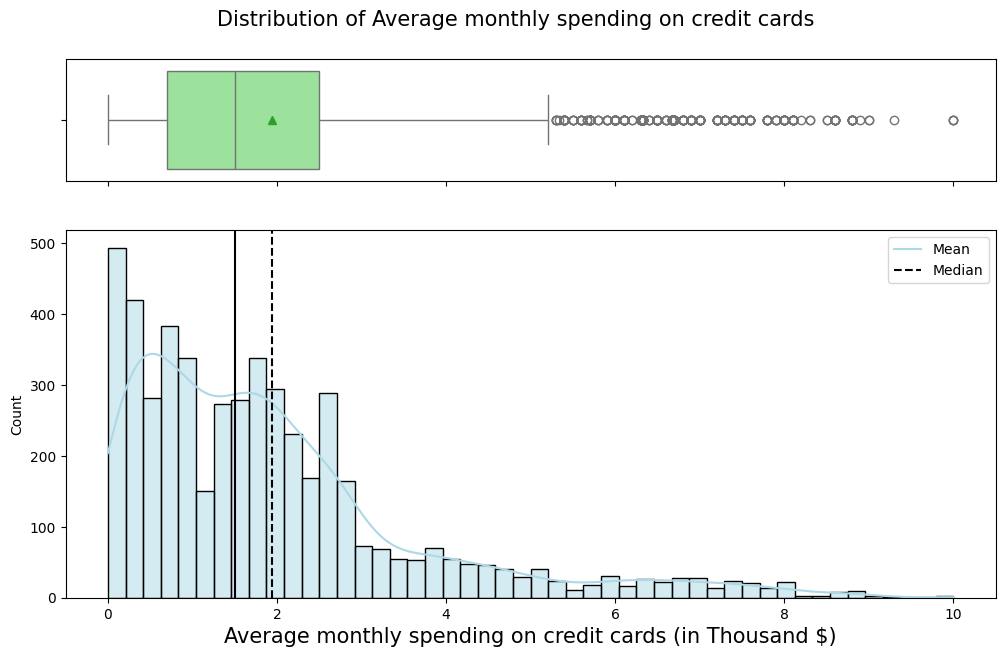

In [ ]:
# Call the Function with Display The Histogram and Boxplot both
histogram_boxplot(data, "CCAvg",
                  xlabel = "Average monthly spending on credit cards (in Thousand $)",
                  Title = "Distribution of Average monthly spending on credit cards",
                  kde=True, boxPlot_Color = 'lightgreen', histPlot_Color = 'lightblue')

In [ ]:
# Check how many customers have no spending on credit card
print('Total', data.loc[data['CCAvg'] == 0]['CCAvg'].count(), 'customers have not spent on credit card')

Total 106 customers have not spent on credit card


**Observation**:
 - Credit card spending shows a right-skewed distribution with many outliers in the upper quartile.
 - There are 106 customers who have zero spending on credit cards. Assuming zero spending implies not holding a credit card, then 4898 customers are considered to hold credit cards. However, it's important to note that holding a credit card doesn't necessarily mean active usage. So, the assumption that 4898 customers hold a credit card is based on the condition that zero spending equates to not holding a credit card.

#### Observations on Education

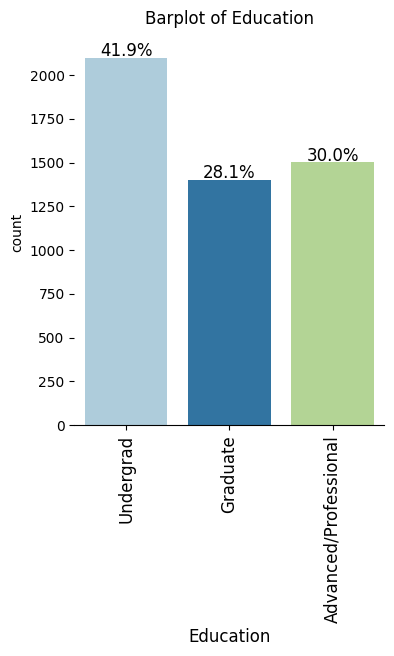

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Education = {1 : 'Undergrad', 2 : 'Graduate', 3 : 'Advanced/Professional'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Weeks', mapping = mapping_Education, perc = True, degree = 90 )

**Observation**:
 - Highest percentage 41.9% of customer are Undergrad
 - 30% of customers are Advanced/Professionals, and 28.1% are Graduates

#### Observations on Mortgage

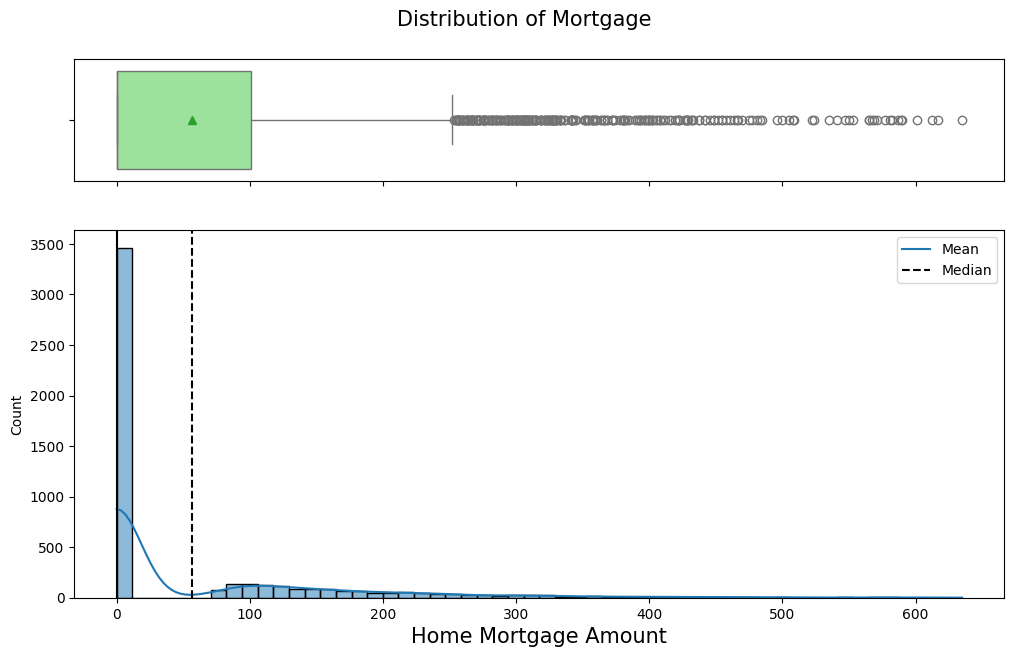

In [ ]:
# Call the Function with Display The Histogram and Boxplot for Mortgage attributes
histogram_boxplot(data, "Mortgage", xlabel = "Home Mortgage Amount",
                  kde=True, boxPlot_Color = 'lightgreen')

**Observation**:
 - The distribution of home mortgage amounts is heavily concentrated around \$0, indicating that the majority of customers (approximately 3500 out of 5000) have not taken out a home loan.
 - The Boxplot depicting mortgage amounts also reveals numerous outliers in the upper quartiles, suggesting that a few customers have taken exceptionally high home mortgages.


 - <u>Note</u>: Tt appears that we need to examine the distribution only for those customers holds a home loan.

In [ ]:
# Chech for how many customers the Mortgage is zero
# those customers has not taken any mortgage from the bank
no_Mortgage = data.loc[data['Mortgage'] == 0]['Mortgage'].count()

# Print the Summary of the Customers have not taken any Mortgage
print('out of', data.shape[0], 'customers,', no_Mortgage, 'customers has not taken any Home Mortgage from the Bank, which is', '{:.2%}'.format(no_Mortgage/data.shape[0]))

out of 5000 customers, 3462 customers has not taken any Home Mortgage from the Bank, which is 69.24%


In [ ]:
# Check the summary of the customers have taken Mortgage
data.loc[data['Mortgage'] != 0]['Mortgage'].describe()

count    1538.000000
mean      183.676203
std       101.361226
min        75.000000
25%       109.000000
50%       153.000000
75%       227.000000
max       635.000000
Name: Mortgage, dtype: float64

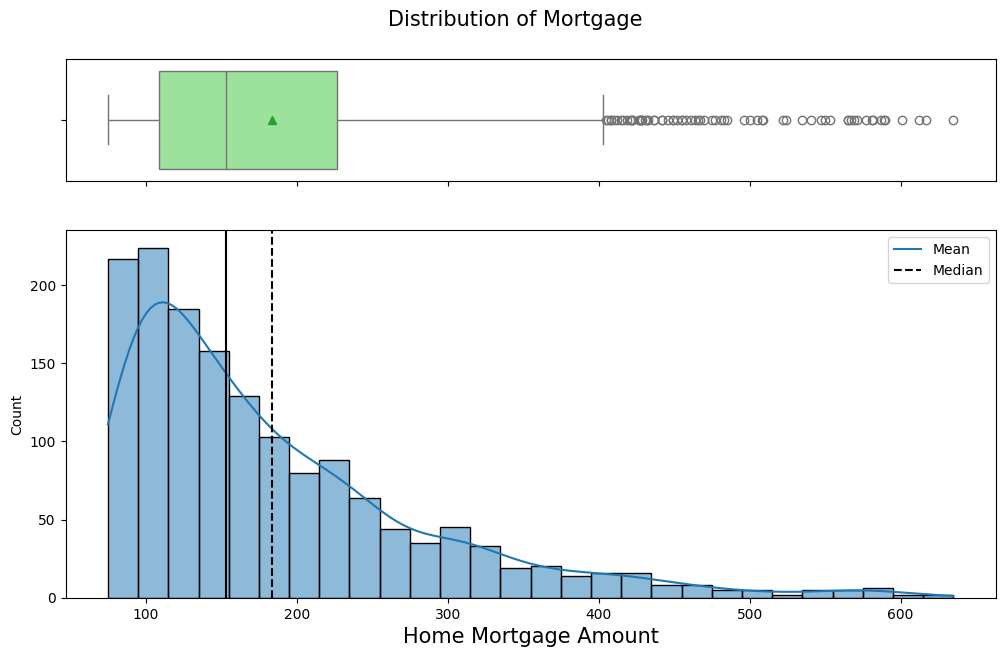

In [ ]:
# Call the Function with Display The Histogram and Boxplot both only for those customers taken Mortgage
histogram_boxplot(data.loc[data['Mortgage'] != 0], "Mortgage", xlabel = "Home Mortgage Amount",
                  kde=True, boxPlot_Color = 'lightgreen')

**Observation**:
 - 69.24% of customers, totaling 3462, have not taken out a home mortgage from the bank.
 - Among customers who did take out home mortgages, the mortgage amount distribution is right-skewed, with numerous outliers in the upper quartile.

#### Observation on Personal Loan

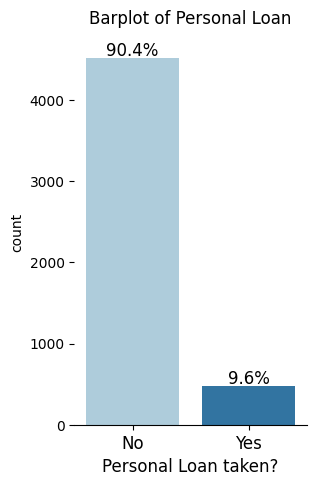

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Personal_Loan = {0 : 'No', 1 : 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Personal_Loan', perc=True, mapping = mapping_Personal_Loan,
                xlabel = 'Personal Loan taken?', Title = 'Personal Loan')

**Observation**: Only 9.6% of customers have taken a Personal Loan from the Bank in the previous campaign, leaving 90.4% without one

#### Observation on Securities Account

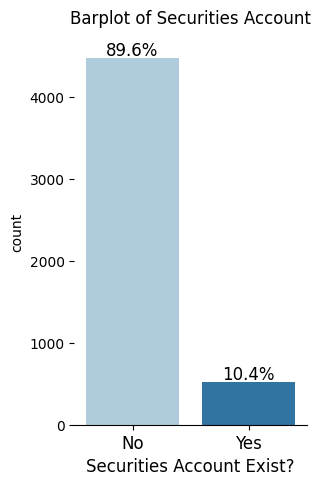

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Securities_Account = {0 : 'No', 1 : 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Securities_Account', perc=True,
                mapping = mapping_Securities_Account,
                xlabel = "Securities Account Exist?", Title = "Securities Account")

**Observation**: only 104% of customers hold Securities Account, remaining 89.6% customers don't

#### Observation on CD Account

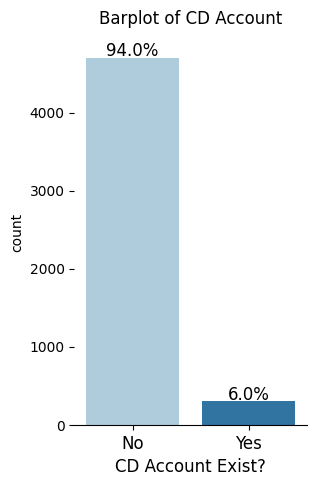

In [ ]:
# Define mapping of numerical values to categorical values
mapping_CD_Account = {0: 'No', 1: 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'CD_Account', perc=True, mapping = mapping_CD_Account,
                Title = "CD Account", xlabel = 'CD Account Exist?')

**Observation**: Only 6% of the customers hold a CD account whereas, 94% of the customers don't

#### Observation on Online Access

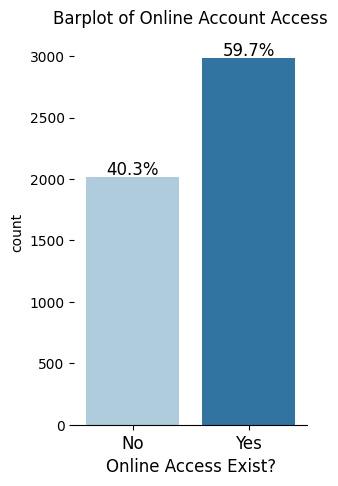

In [ ]:
# Define mapping of numerical values to categorical values
mapping_Online = {0: 'No', 1: 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'Online', perc=True, mapping = mapping_Online,
                Title = 'Online Account Access', xlabel = "Online Access Exist?")

**Observation**: 59.7% of the Bank's customers have online access, remaining 40.3 % customers don't

#### Observation on Credit Card

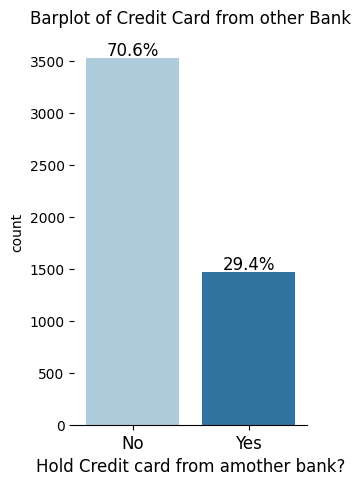

In [ ]:
# Define mapping of numerical values to categorical values
mapping_CreditCard = {0: 'No', 1: 'Yes'}

# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'CreditCard', mapping = mapping_CreditCard,
                perc=True, Title = 'Credit Card from other Bank',
                xlabel = 'Hold Credit card from amother bank?')

In [ ]:
# Check the exact number of how many customer holds credit card from other bank -
print(data.loc[data['CreditCard'] == 1]['CreditCard'].count(), 'customers out of 5000, holds credit card from other banks')

1470 customers out of 5000, holds credit card from other banks


**Observation**:
 - 1470 (29.4%) out of 5000, hold credit card from other banks, rest of the customers (70.6%) don't

#### Observation on Zip Code

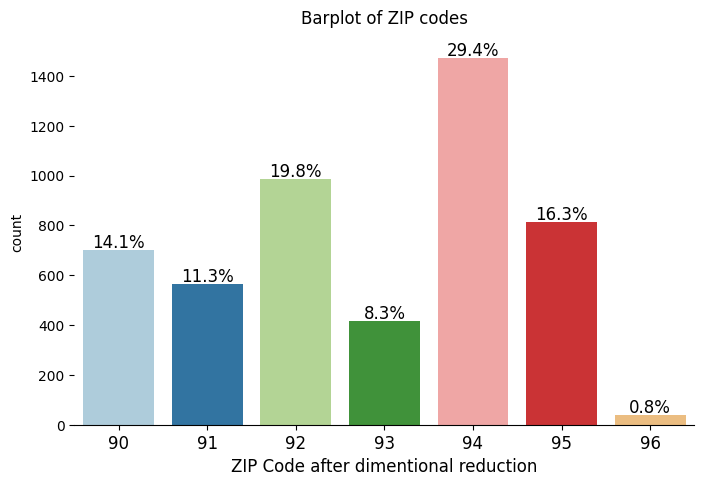

In [ ]:
# Call the Function with Display Labeled Barplot
labeled_barplot(data, 'ZIPCode', perc=True,
                xlabel = "ZIP Code after dimentional reduction",
                Title = "ZIP codes")

**Observation**:
  - Zip codes can be grouped into seven regions based on their first two digits.
  - 29.4% of customers reside in zip codes beginning with 94, while 0.8% are in zip codes starting with 96.

### Bivariate Analysis

#### Checking Correlation among variables

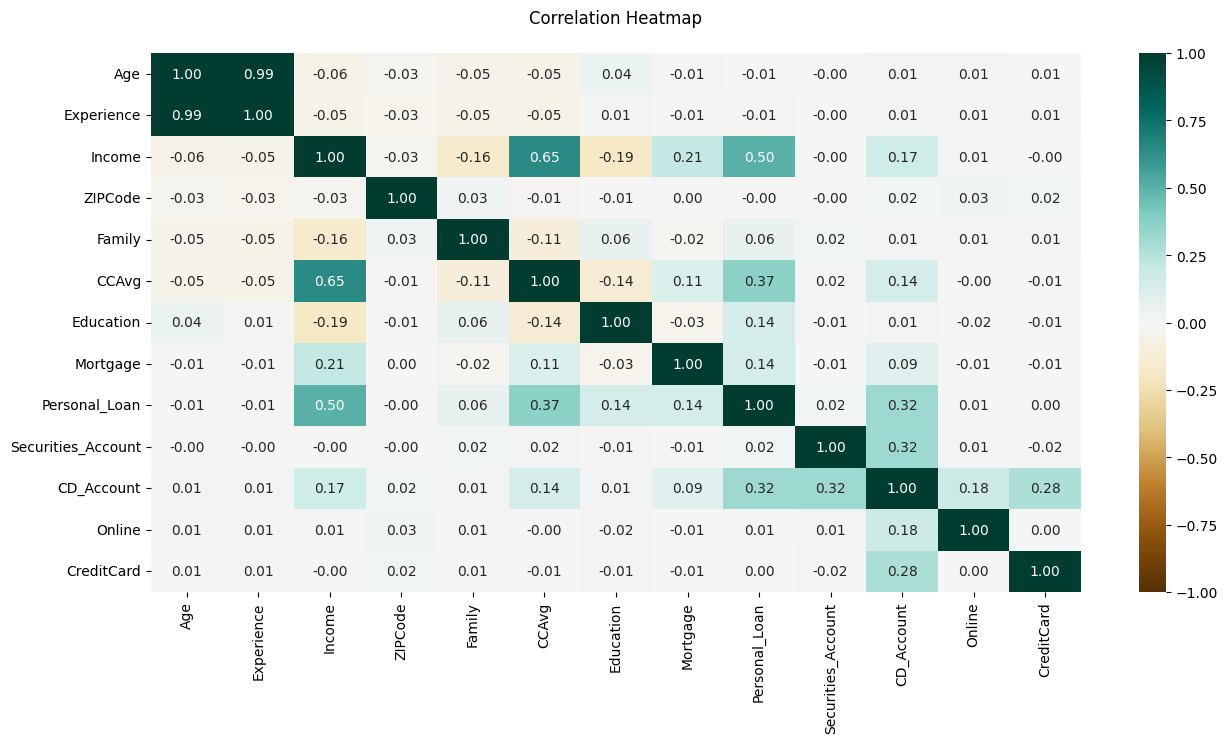

In [ ]:
# Assess the correlation among all columns.
# Exclude the Zip Code from the analysis as we've replaced it with a region group code using dimensional reduction.
# Plot the heatmap and set a title using the set_title() method.

plt.figure(figsize=(15, 7))
heatmap = sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="BrBG")
heatmap.set_title('Correlation Heatmap', y=1.04)
plt.show()

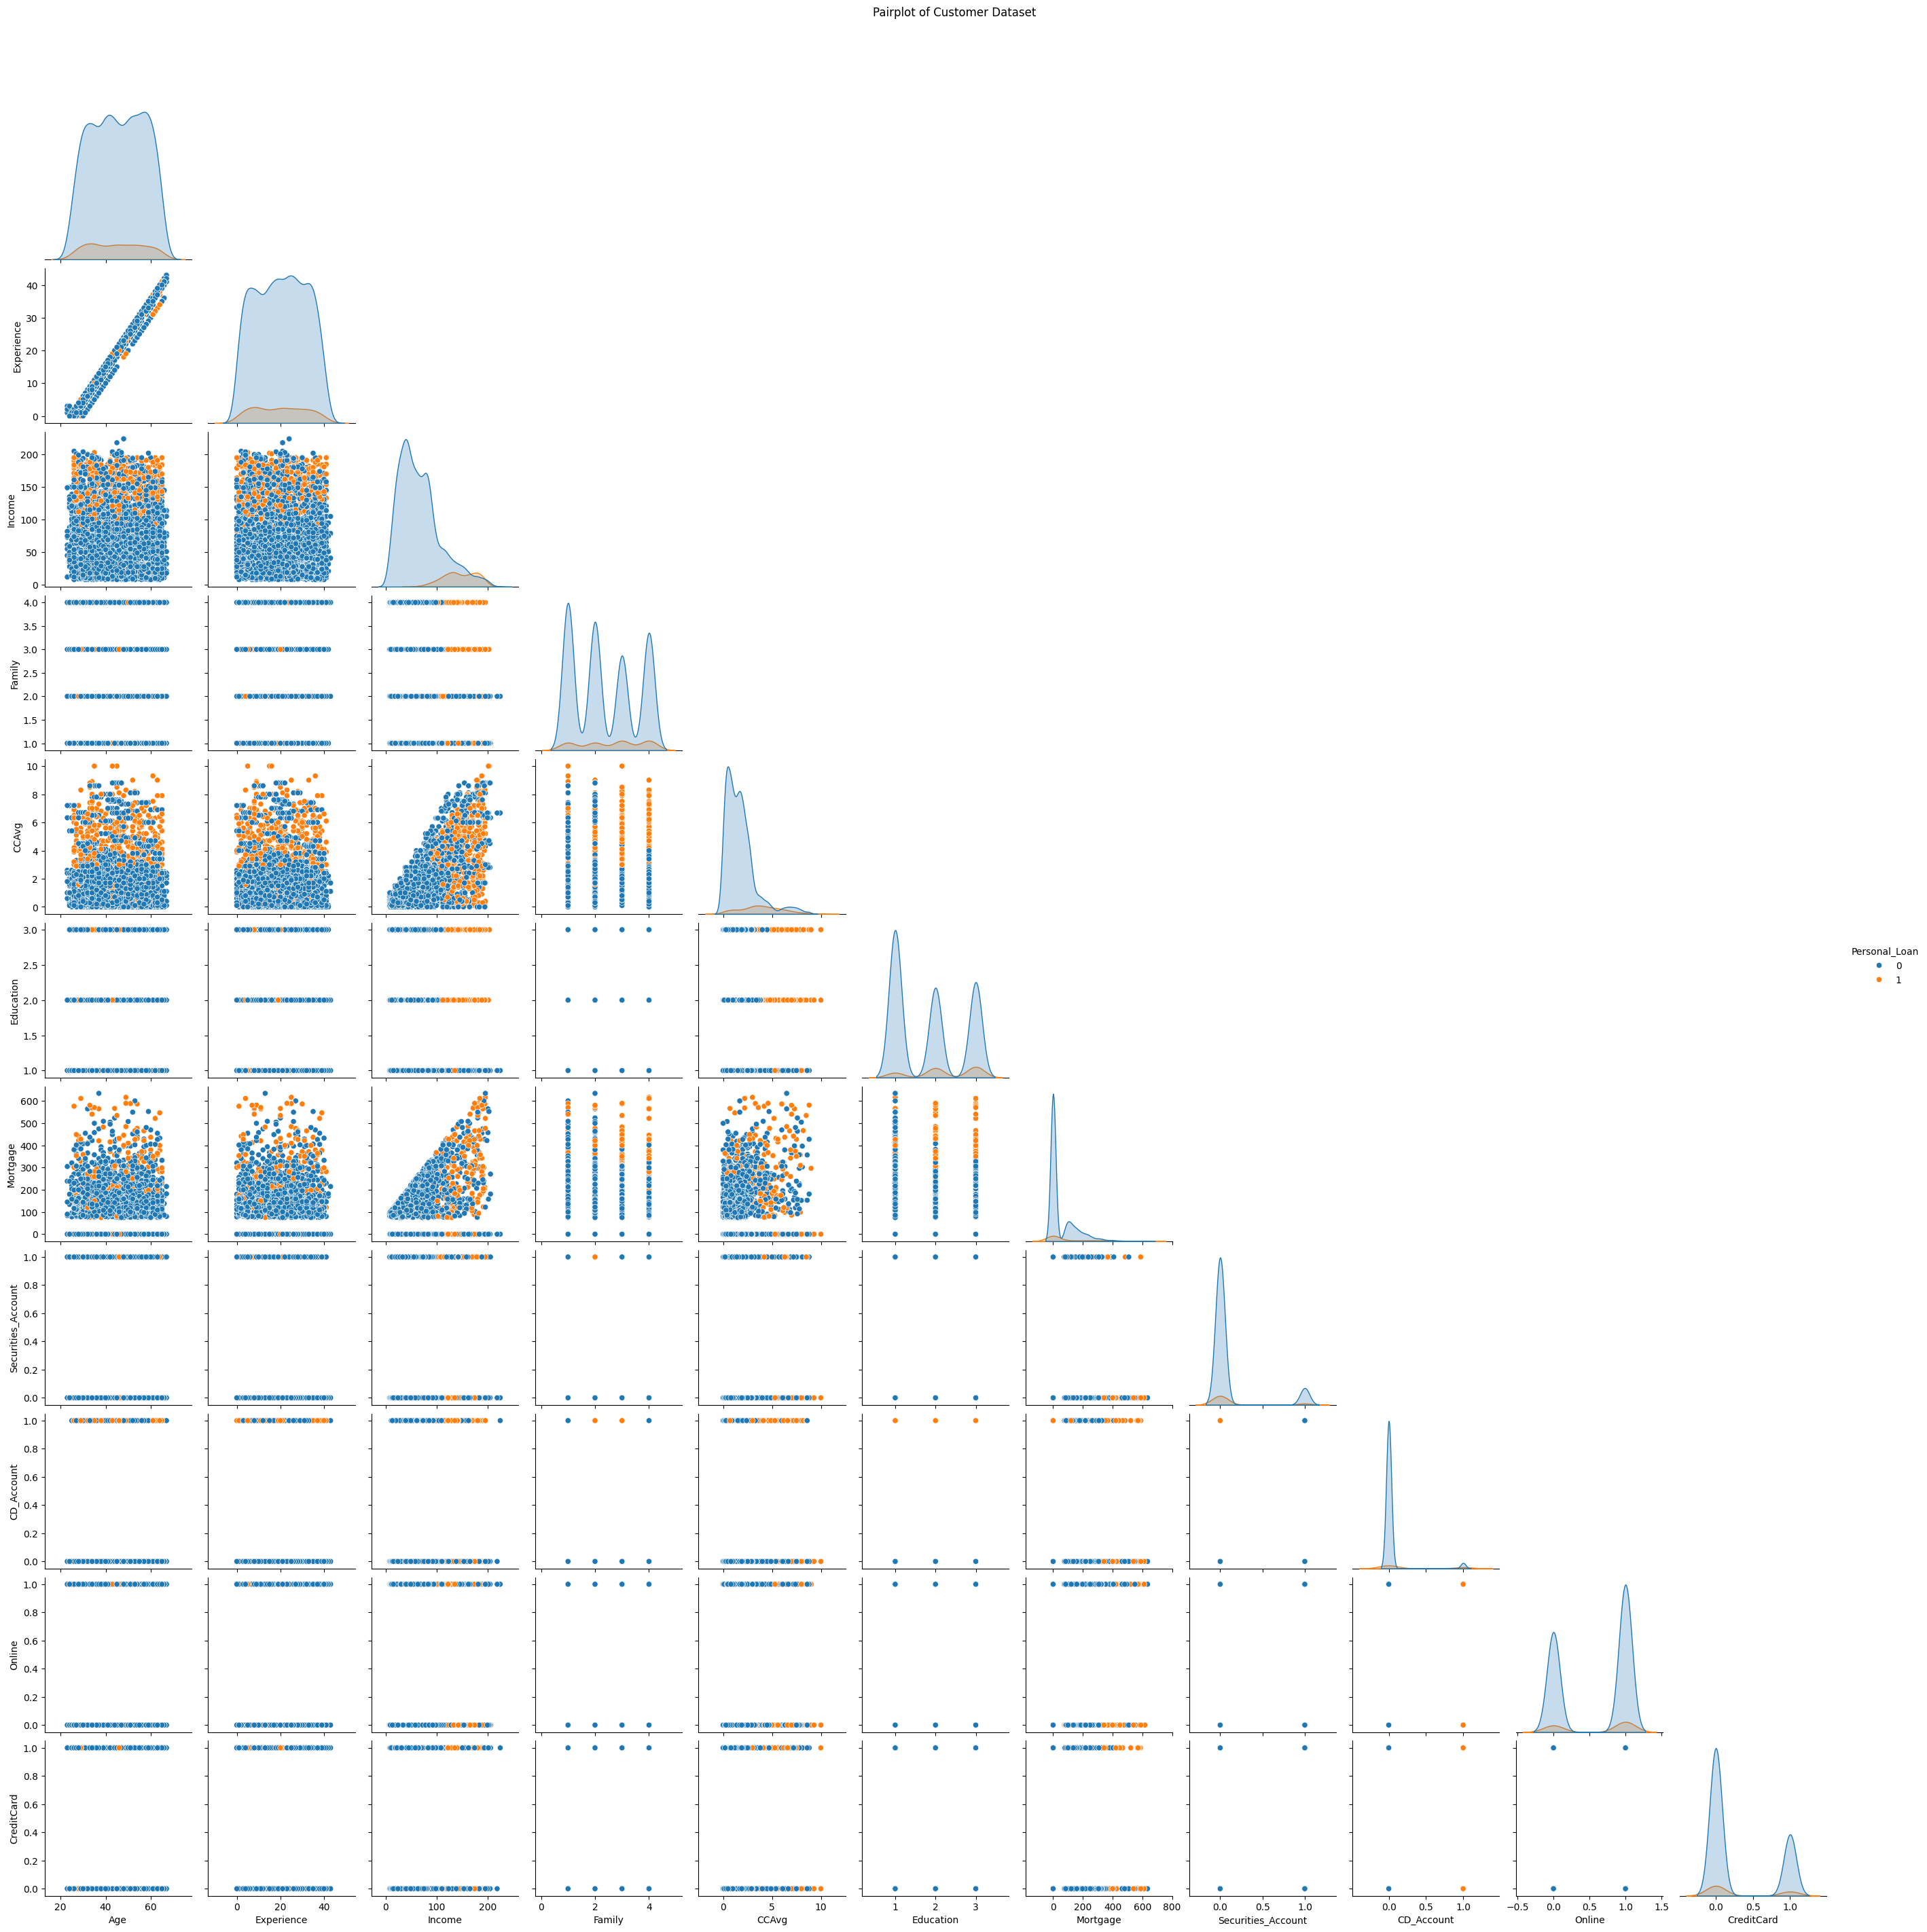

In [ ]:
# Create a pairplot for Bivariate analysis
sns.pairplot(data, diag_kind="kde", hue="Personal_Loan", corner=True)
plt.suptitle('Pairplot of Customer Dataset', y=1.04)
plt.show()

**Observation**:
 - Age and Experience exhibit a very high positive correlation, indicating that professional experience tends to increase with age. This relationship is expected.
 - Income shows a positive correlation with credit card spending and personal loan amount. Higher income is associated with higher credit card spending and a greater tendency to take out personal loans.
 - A moderate positive relationship exists between personal loans and average credit card spending. It appears that some customers may have taken a personal loan to pay off their credit card expenses.

#### Personal Loan vs Age

IndexError: list index out of range

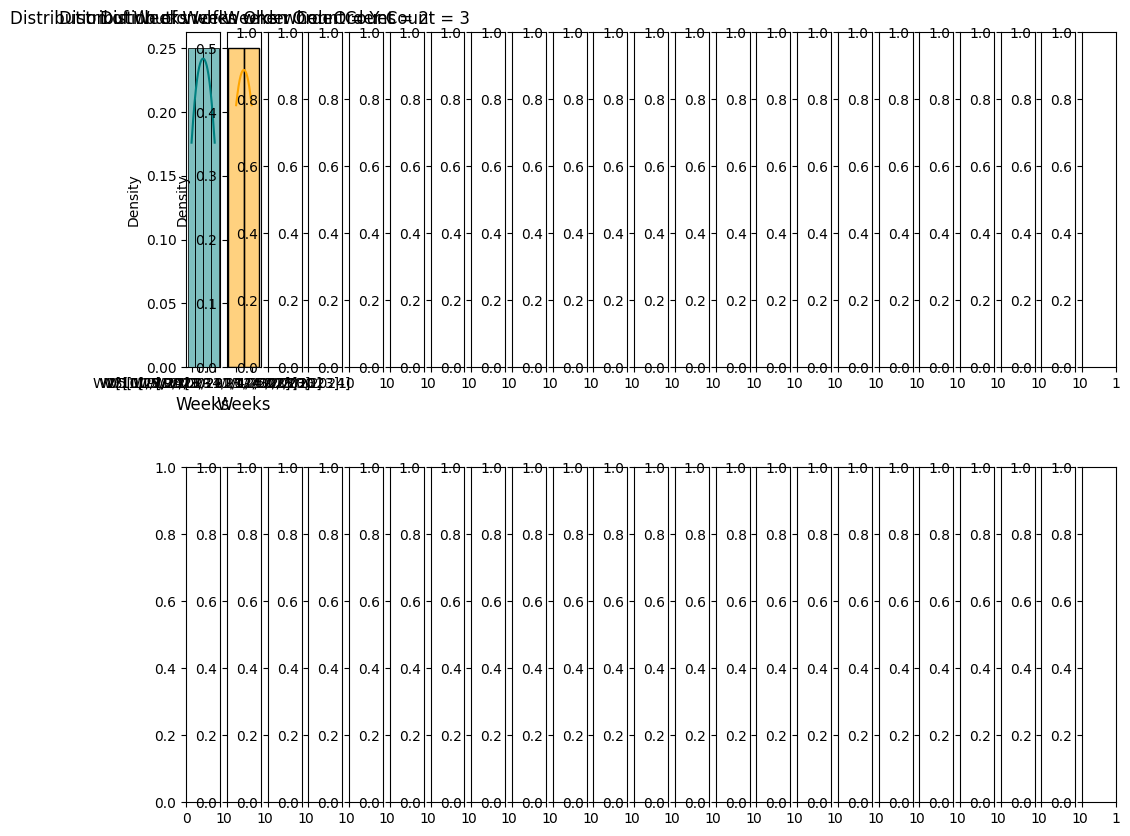

In [ ]:
# Define mapping of numerical values to respective categorical values for Personal Loan  Column
mapping_Personal_Loan = {0: 'No', 1: 'Yes'}

# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Weeks", "Order_Count",
                              mapping = mapping_Personal_Loan,
                              ked = True)

**Observation**:
The age distribution among customers with Personal Loans and without Personal Loans is similar, indicating that interest in Personal Loans is not significantly influenced by age.

#### Personal Loan vs Experience

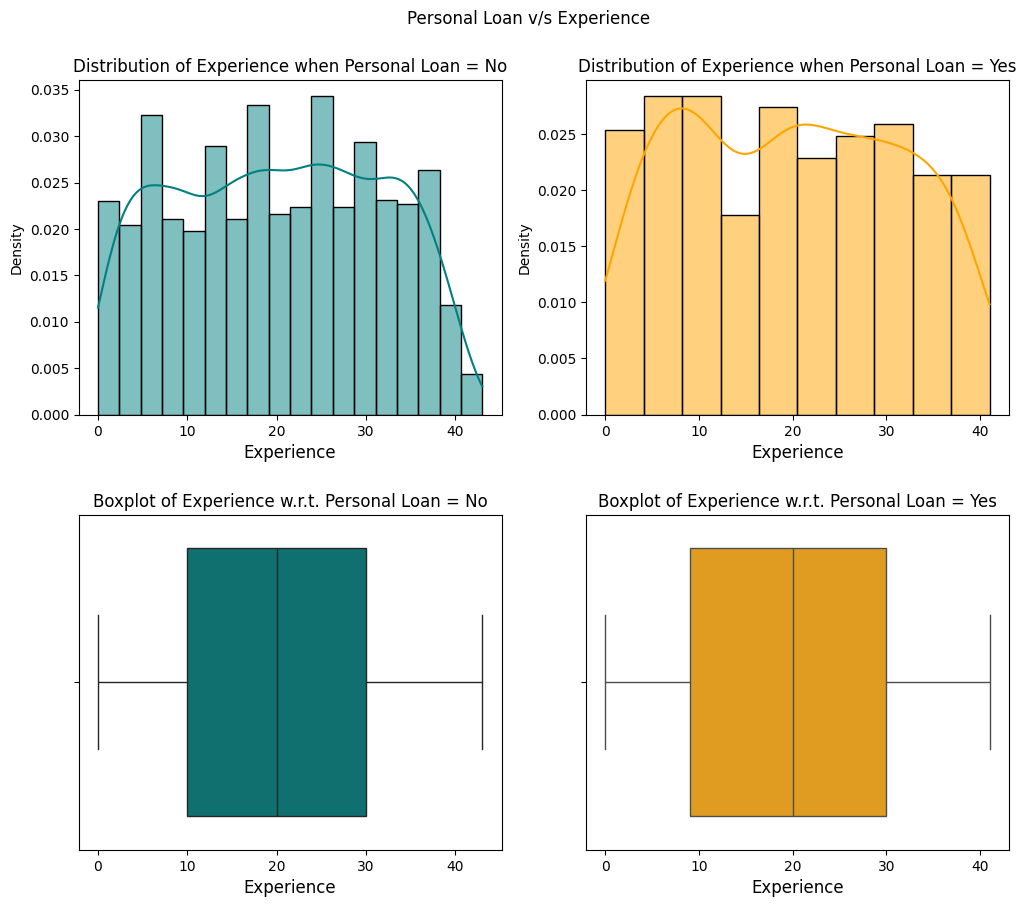

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Experience", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              ked = True)

**Observation**:
The distribution of professional experience among customers, both with and without Personal Loans, is similar, suggesting that interest in Personal Loans is not significantly influenced by professional experience.

#### Personal Loan vs Income

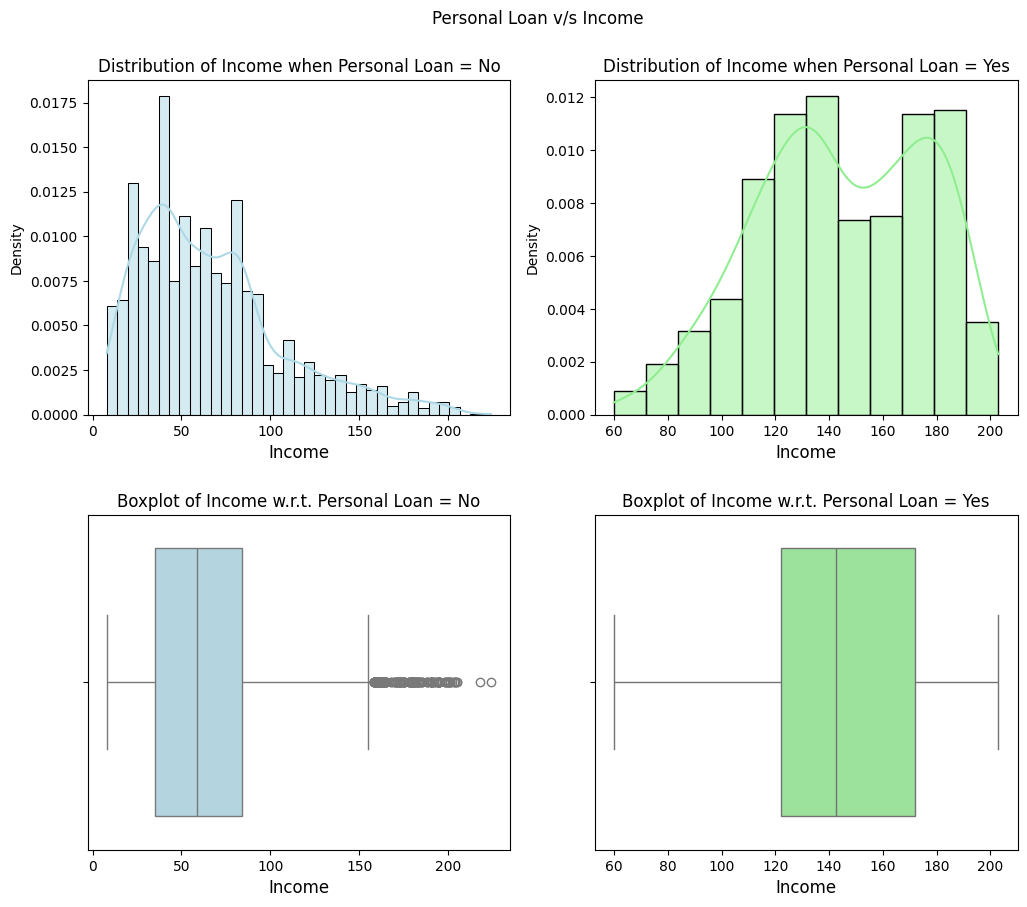

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Income", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              Color = ["lightblue", "lightgreen"], ked = True)

**Obserbation**:
 - The income distribution among customers who have taken a Personal Loan is left-skewed, indicating a higher proportion of high-income customers among Personal Loan holders compared to low-income customers. The average income of Personal Loan holders exceeds \$140,000 annually. The minimum average income of customers who accepted the loan is around \$60,000.
 - The income distribution among customers who have not taken a Personal Loan is right-skewed, with numerous outliers. This suggests that potential loan customers primarily belong to the low-income category (with an average income close to \$55,000 annually). However, the presence of outliers above the upper whisker indicates that there are also a few customers with very high incomes have not taken personal loan.

#### Personal Loan vs Family Size

╒══════════════════════════════╤═══════╤═════╤═════╤═════╤═════╤═════╤═════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤══════╤═══════╕
│ Order Count                  │   Yes │   2 │   3 │   4 │   5 │   7 │   8 │   10 │   11 │   12 │   13 │   16 │   17 │   22 │   24 │   25 │   26 │   27 │   28 │   29 │   30 │   43 │   44 │   All │
│ Weeks                        │       │     │     │     │     │     │     │      │      │      │      │      │      │      │      │      │      │      │      │      │      │      │      │       │
╞══════════════════════════════╪═══════╪═════╪═════╪═════╪═════╪═════╪═════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪══════╪═══════╡
│ W10[12/24/2023 - 12/30/2023] │     1 │   0 │   0 │   0 │   0 │   0 │   0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │    0 │     1 │
├──────────────

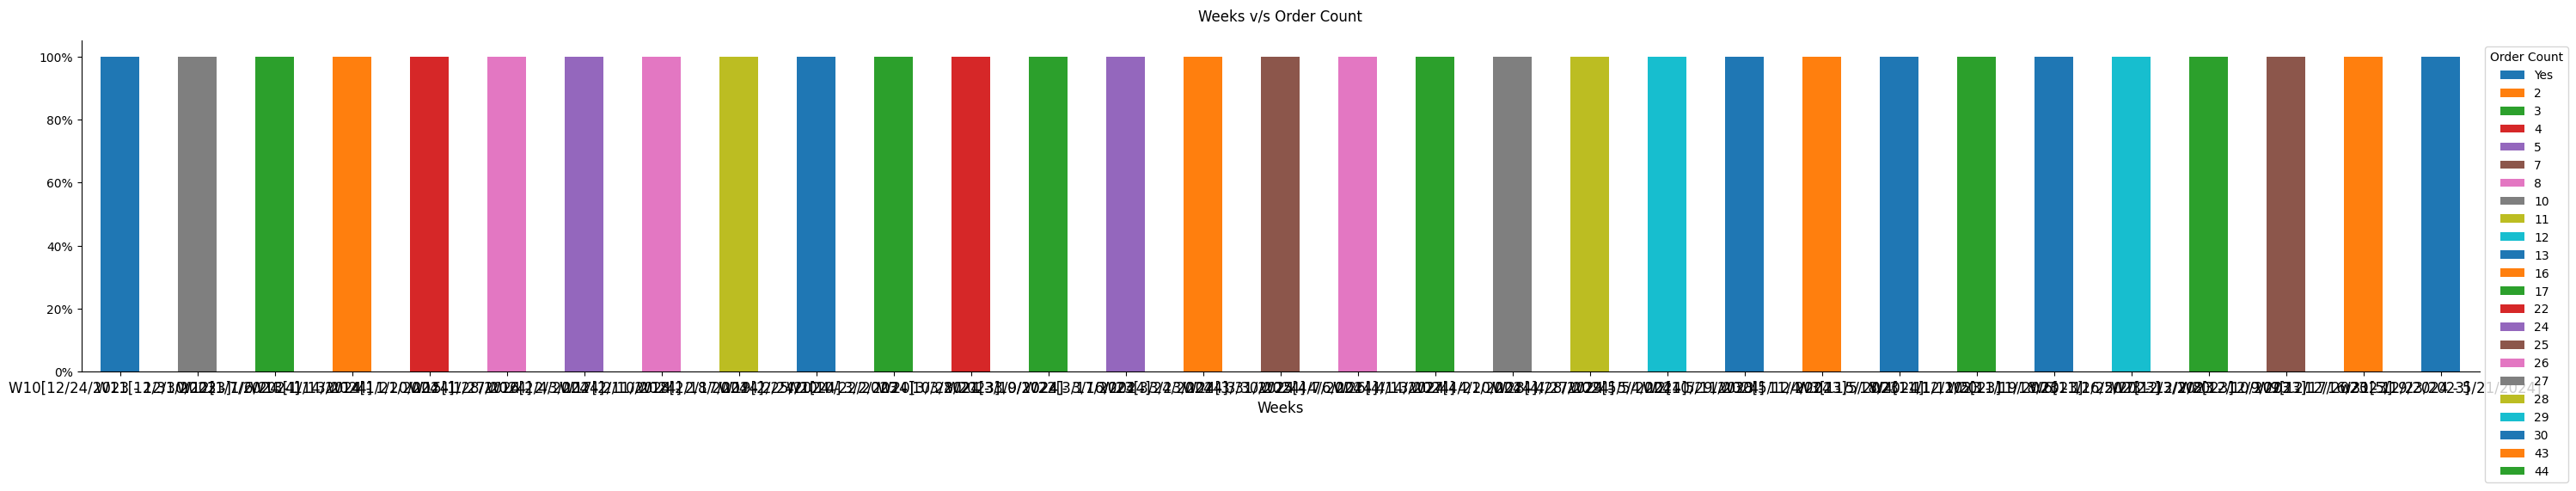

In [ ]:
# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Weeks", "Order_Count",
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Weeks", "Order_Count",   # Plot Data
                column_mapping = mapping_Personal_Loan,
                )

**Observation**:
Among customers with family sizes of 3 to 4, there is a tendency to take out more Personal Loans compared to those with family sizes of 1 or 2.

#### Personal Loan vs Education

╒═══════════════════════╤══════╤═══════╤═══════╕
│ Personal Loan         │   No │   Yes │   All │
│ Education             │      │       │       │
╞═══════════════════════╪══════╪═══════╪═══════╡
│ Undergrad             │ 2003 │    93 │  2096 │
├───────────────────────┼──────┼───────┼───────┤
│ Graduate              │ 1221 │   182 │  1403 │
├───────────────────────┼──────┼───────┼───────┤
│ Advanced/Professional │ 1296 │   205 │  1501 │
├───────────────────────┼──────┼───────┼───────┤
│ All                   │ 4520 │   480 │  5000 │
╘═══════════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


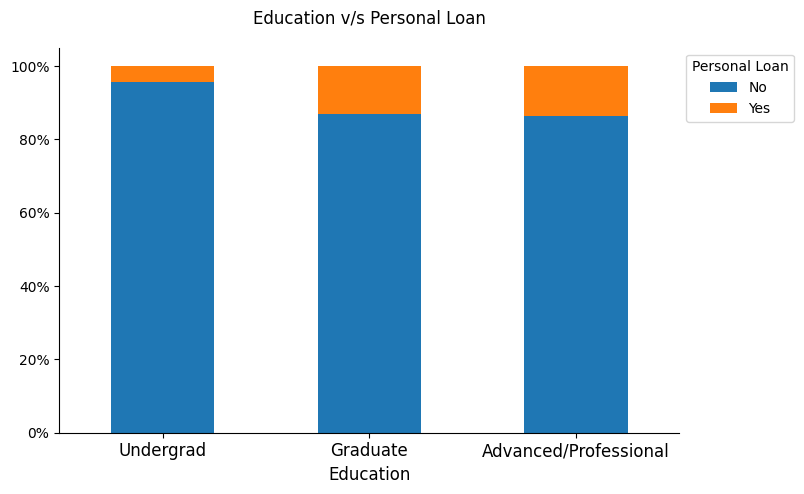

In [ ]:
# Define mapping of numerical values to respective categorical values for Education Column
mapping_Education = {1 : 'Undergrad', 2 : 'Graduate', 3 : 'Advanced/Professional'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Education", "Personal_Loan",
            index_mapping = mapping_Education,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Education", "Personal_Loan",   # Plot Data
                index_mapping = mapping_Education,
                column_mapping = mapping_Personal_Loan
                )

**Observation**: Customers with higher education levels tend to opt for more Personal Loans, likely due to their higher incomes.

#### Personal Loan vs Home Mortgage

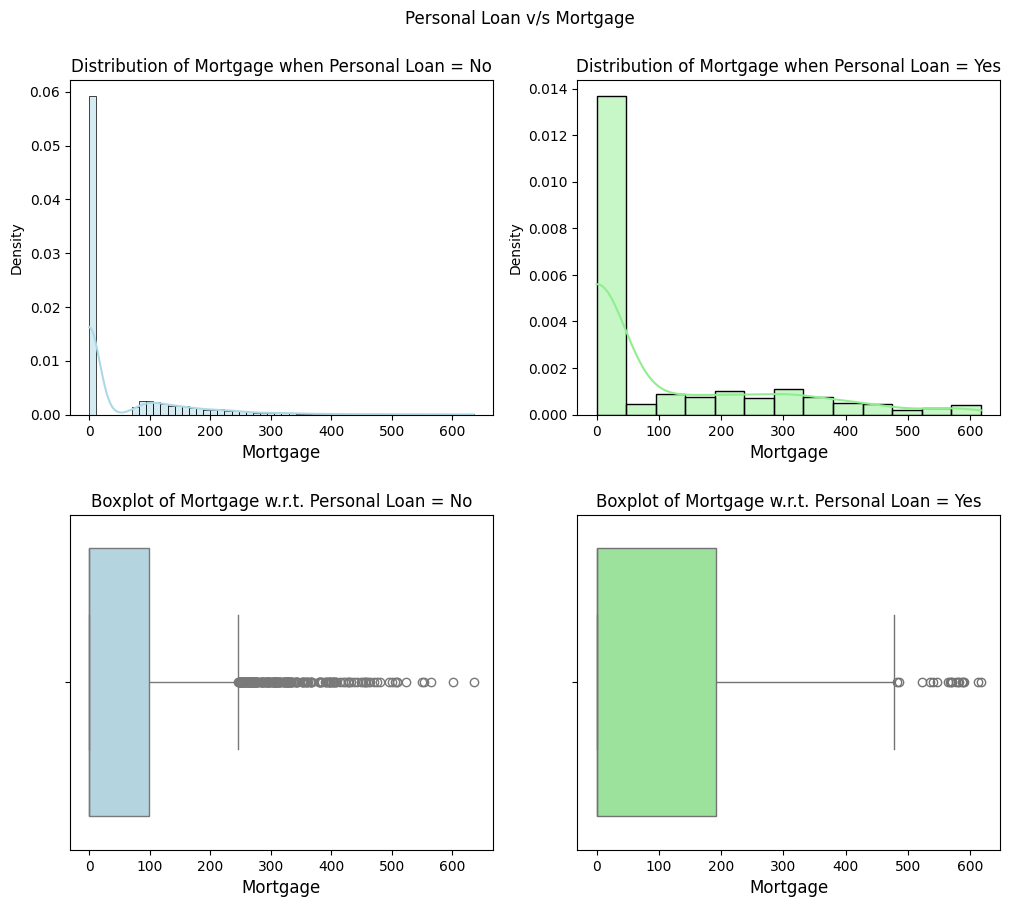

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              Color = ["lightblue", "lightgreen"], ked = True)

**Observation**:

 - The Home Mortgage amounts distribution for customers are majorly concentrated around Zero, whether they have taken personal loans or not. This suggests that a significant number of customers have not opted for a mortgage. Absence of lower whiskers on the box plots also indicates the same.
 - Comparison of both the box plot indicates, cutomers with mortgage have a tendency to take more personal loan on an average.

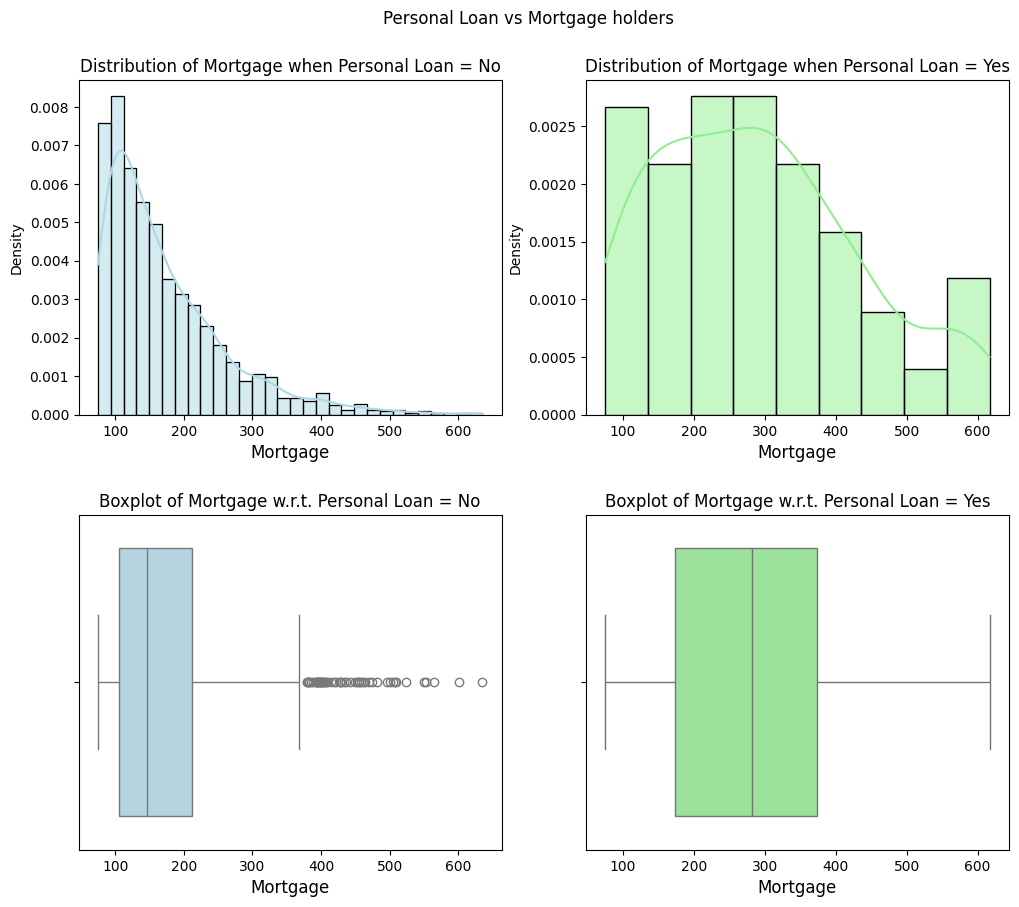

In [ ]:
# Get the customer not taken any mortgage
Mortgage_holders = data.loc[data['Mortgage'] != 0]

# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(Mortgage_holders, "Mortgage", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                             Title = "Personal Loan vs Mortgage holders",
                              Color = ["lightblue", "lightgreen"], ked = True)

**Observation**:
 - For Mortgage Holders who haven't taken personal loans, the box plot shows a right-skewed distribution with a median Mortgage amount of about \$145,000. This suggests that over 50% of these customers have Home mortgages under $150,000. The presence of outliers indicates that some customers have opted for very high mortgage amounts.
 - The box plot depicting customers with both Home Mortgages and Personal Loans shows a right-skewed distribution, with a median mortgage amount of approximately \$290,000. This implies that customers who have taken personal loans also tend to take higher mortgage amounts, and vice versa.

#### Personal_Loan vs Credit Card Usage

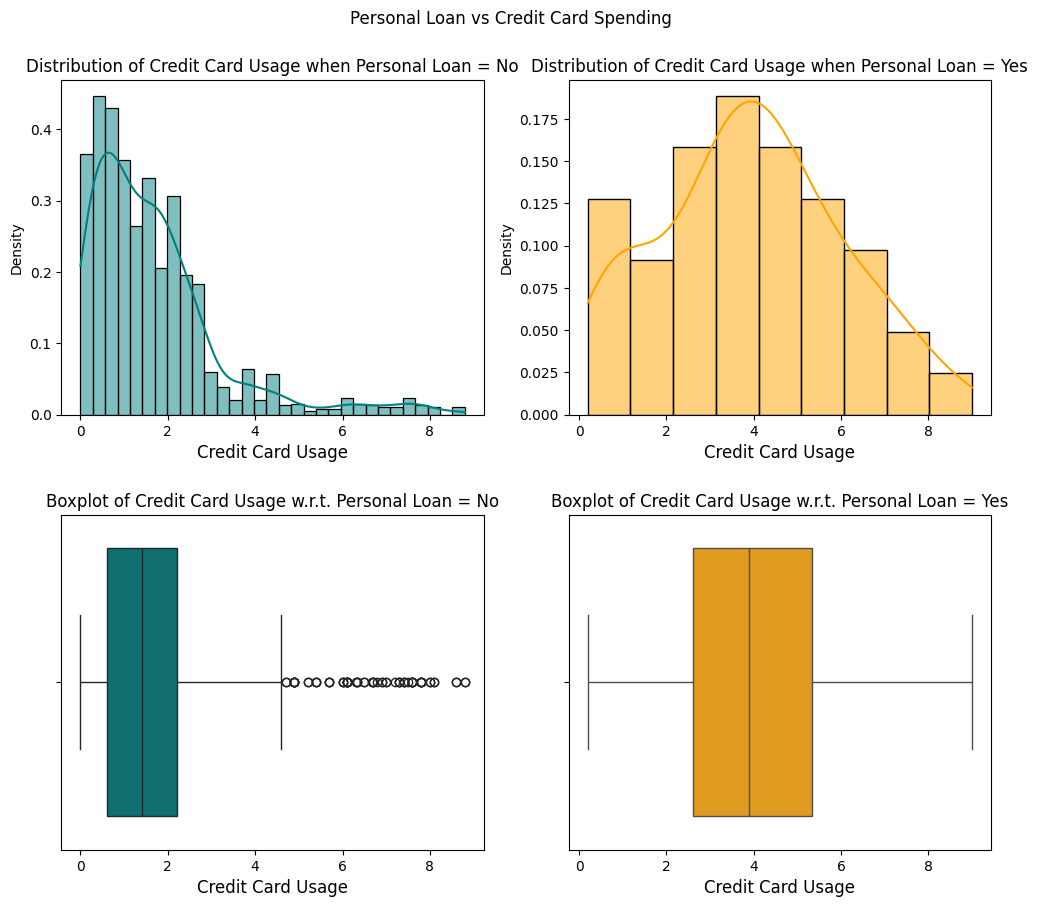

In [ ]:
# Display a Distribution plot with Boxplot
distribution_plot_wrt_target(Mortgage_holders, "CCAvg", "Personal_Loan",
                              mapping = mapping_Personal_Loan,
                              Title = "Personal Loan vs Credit Card Spending",
                              xlabel = "Credit Card Usage",
                              ked = True,
                              )

**Observation**:
 - The box plot illustrating customers who have taken Personal Loans have a slightly right-skewed distribution, with a median monthly Credit Card spending of approximately \$3,800.
 - Conversely, for customers who haven't taken personal loans, the box plot displays a right-skewed distribution with a median monthly Credit Card spending of around \$1,400. This indicates that the typical Credit Card spending among these customers is significantly lower compared to those who have taken Personal Loans. Notably, the presence of outliers suggests that certain customers exhibit very high Credit Card spending patterns.
 - Therefore, it can be inferred that customers who have higher Credit Card spending seems prefer personal loans.

#### Personal Loan vs Secutities Account

╒══════════════════════╤══════╤═══════╤═══════╕
│ Personal Loan        │   No │   Yes │   All │
│ Securities Account   │      │       │       │
╞══════════════════════╪══════╪═══════╪═══════╡
│ Yes                  │  462 │    60 │   522 │
├──────────────────────┼──────┼───────┼───────┤
│ No                   │ 4058 │   420 │  4478 │
├──────────────────────┼──────┼───────┼───────┤
│ All                  │ 4520 │   480 │  5000 │
╘══════════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


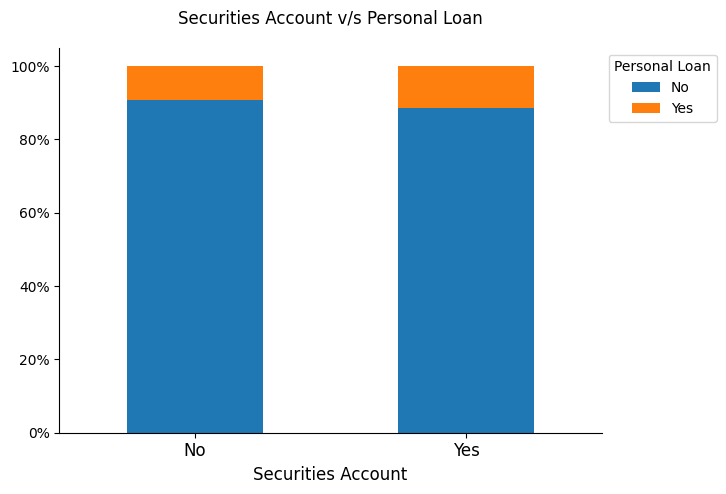

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_Securities_Account = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Securities_Account", "Personal_Loan",
            index_mapping = mapping_Securities_Account,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Securities_Account", "Personal_Loan",   # Plot Data
                index_mapping = mapping_Securities_Account,
                column_mapping = mapping_Personal_Loan,
                )

**Observation**: Around 10 percent of customers have a securities account with the bank, regardless of whether they have taken a personal loan.

#### Personal Loan vs CD Accounts

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ CD Account      │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ Yes             │  162 │   140 │   302 │
├─────────────────┼──────┼───────┼───────┤
│ No              │ 4358 │   340 │  4698 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


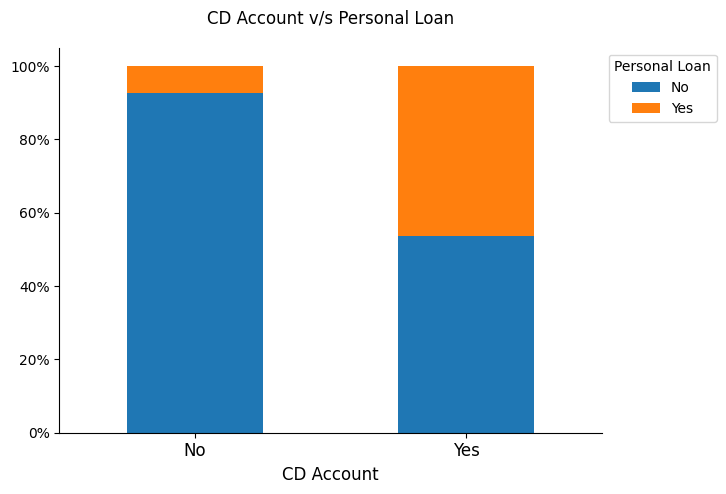

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_CD_Account = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "CD_Account", "Personal_Loan",
            index_mapping = mapping_CD_Account,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "CD_Account", "Personal_Loan",   # Plot Data
                index_mapping = mapping_CD_Account,
                column_mapping = mapping_Personal_Loan
                )

**Observation**: Customers with Personal Loans have a higher ownership rate of CD accounts, about 46% among all Personal Loan holders, while those without Personal Loans have a lower ownership rate, approximately 7% among all non-Personal Loan holders.

#### Personal Loan vs Online Access

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ Online          │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ No              │ 1827 │   189 │  2016 │
├─────────────────┼──────┼───────┼───────┤
│ Yes             │ 2693 │   291 │  2984 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


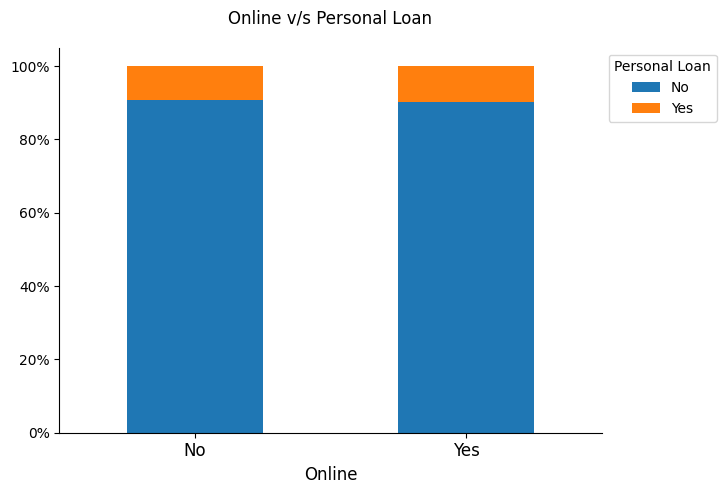

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_Online = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "Online", "Personal_Loan",
            index_mapping = mapping_Online,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "Online", "Personal_Loan",   # Plot Data
                index_mapping = mapping_Online,
                column_mapping = mapping_Personal_Loan
                )

**Observation**:
Irrespective of whether they have a Personal Loan, only about 10% of customers possess credit cards from different banks.

#### Personal Loan vs Holding Credit Card from different banks

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ CreditCard      │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ Yes             │ 1327 │   143 │  1470 │
├─────────────────┼──────┼───────┼───────┤
│ No              │ 3193 │   337 │  3530 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


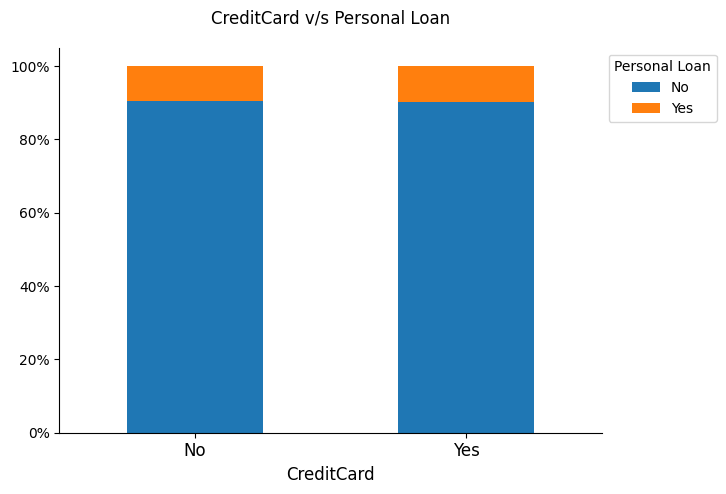

In [ ]:
# Define mapping of numerical values to respective categorical values for Security Accounts
mapping_CreditCard = {0: 'No', 1: 'Yes'}

# Print a table with data where predictor is on x column and target is stacked
print_table(data, "CreditCard", "Personal_Loan",
            index_mapping = mapping_CreditCard,
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "CreditCard", "Personal_Loan",   # Plot Data
                index_mapping = mapping_CreditCard,
                column_mapping = mapping_Personal_Loan
                )

**Observation**:
Irrespective of whether they have a Personal Loan, only about 10% of customers possess credit cards from different banks.

#### Personal Loan vs Zip Code

╒═════════════════╤══════╤═══════╤═══════╕
│ Personal Loan   │   No │   Yes │   All │
│ ZIPCode         │      │       │       │
╞═════════════════╪══════╪═══════╪═══════╡
│ 96              │   37 │     3 │    40 │
├─────────────────┼──────┼───────┼───────┤
│ 93              │  374 │    43 │   417 │
├─────────────────┼──────┼───────┼───────┤
│ 91              │  510 │    55 │   565 │
├─────────────────┼──────┼───────┼───────┤
│ 90              │  636 │    67 │   703 │
├─────────────────┼──────┼───────┼───────┤
│ 95              │  735 │    80 │   815 │
├─────────────────┼──────┼───────┼───────┤
│ 92              │  894 │    94 │   988 │
├─────────────────┼──────┼───────┼───────┤
│ 94              │ 1334 │   138 │  1472 │
├─────────────────┼──────┼───────┼───────┤
│ All             │ 4520 │   480 │  5000 │
╘═════════════════╧══════╧═══════╧═══════╛
------------------------------------------------------------------------------------------------------------------------


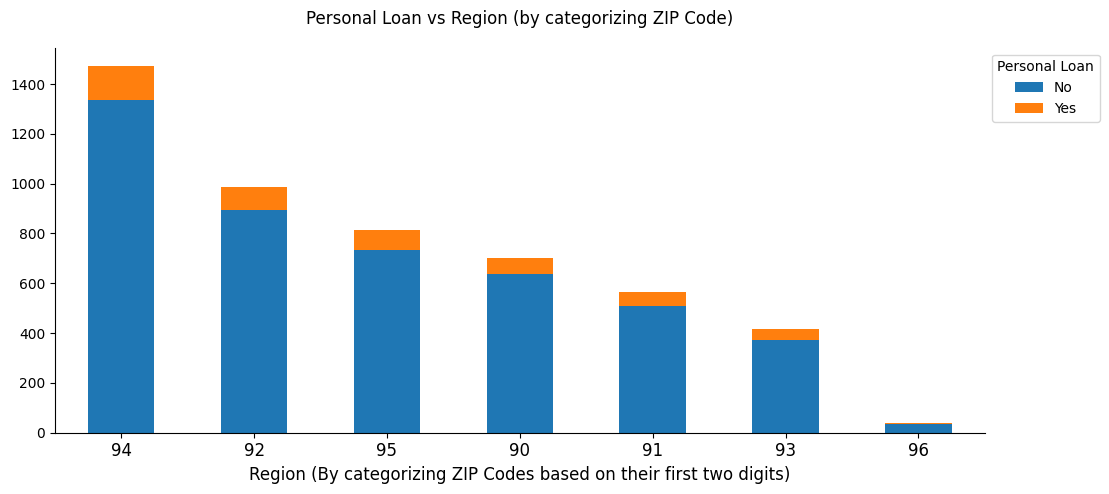

In [ ]:
# Print a table with data where predictor is on x column and target is stacked
print_table(data, "ZIPCode", "Personal_Loan",
            column_mapping = mapping_Personal_Loan,
            )
print("-" * 120)

# Stached a Custom Barplot
stacked_barplot(data, "ZIPCode", "Personal_Loan",   # Plot Data
                column_mapping = mapping_Personal_Loan,
                Title = "Personal Loan vs Region (by categorizing ZIP Code)",
                xlabel = "Region (By categorizing ZIP Codes based on their first two digits)",
                normatized_by_index = False,
                )

**Observation**: Customers' interest in personal loans is not influenced by region.

## Data preprocessing after EDA

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Missing Value Treatment

 - The customer data does not contain any null or missing values in any column, eliminating the need for missing value treatment.

### Feature Engineering

 - Feature engineering was conducted by applying ZIP code prefix aggregation to the Zip code column.
 - As per EDA, it's clear that most customers neither have a Mortgage nor a Personal Loan.Hence Mortgage can be restructured as Yes/No for better analysis

### Identify Catagorical Columns

In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Family",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

# check the datatype of all the column after convertion
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB
None


### Outlier Detection

#### Define Useful functions

In [ ]:
# Function to calculate whiskers and count outliers
def calculate_whiskers_and_outliers(data, column_name):
    # Calculate quartiles
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)

    # Calculate IQR and whiskers
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Count outliers
    outliers =(data[column_name] < lower_whisker) | (data[column_name] > upper_whisker)
    outlier_count = outliers.sum()  # Sum of True values gives the count of outliers

    return lower_whisker, upper_whisker, outlier_count

In [ ]:
# functions to treat outliers by flooring and capping
def treat_outliers(df, col):
    # identify the outliers
    Lower, Upper = calculate_whiskers(df, col)

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower, Upper)

    return df

In [ ]:
# Function to treat outliers for all the columns
def treat_outliers_all(df, col_list):
  for c in col_list:
    df = treat_outliers(df, c)

In [ ]:
# Display Boxplots of numerical columns to check outliers
def display_boxplots(data, txt = None, whis = 1.5, color = "lightgreen"):
  # Identify the number of numerical column
  numerical_columns = data.select_dtypes(include=[np.number]).columns

  fig, axs = plt.subplots(1,len(numerical_columns), figsize=(18, 8))

  # Loopthrough all the vveriables
  for i, variable in enumerate(numerical_columns):
    # Create a boxplot for each variable
    sns.boxplot(data[variable], whis = whis, ax = axs[i], color = color)
    axs[i].set_title(variable.replace("_", " "))                          # Set the title of the Box plot
    axs[i].set_ylabel('')                                                 # Remove y-axis label

    # Caculate lower Whisker, Upper Whisker and no of outliers
    lower, upper, outlier_count = calculate_whiskers_and_outliers(data, variable)

    percentage_outliers = "{:.2f}".format(outlier_count / len(data['Age']) * 100)      # Calculate % of Outliers

    # Add text to the plot
    text = f"Lower Whisker: {lower}\nUpper Whisker: {upper}\nNumber of outliers: {outlier_count}\n% of outliers: {percentage_outliers}%"

    # Add text to the plot
    axs[i].text(0.05, -0.11, text, fontsize=10, ha='left', va='bottom', transform=axs[i].transAxes)  #

  plt.subplots_adjust(wspace=0.1)  # Adjust the spacing between subplots as needed
  plt.tight_layout()
  plt.show()  # Display the plot

#### Outlier Visualization

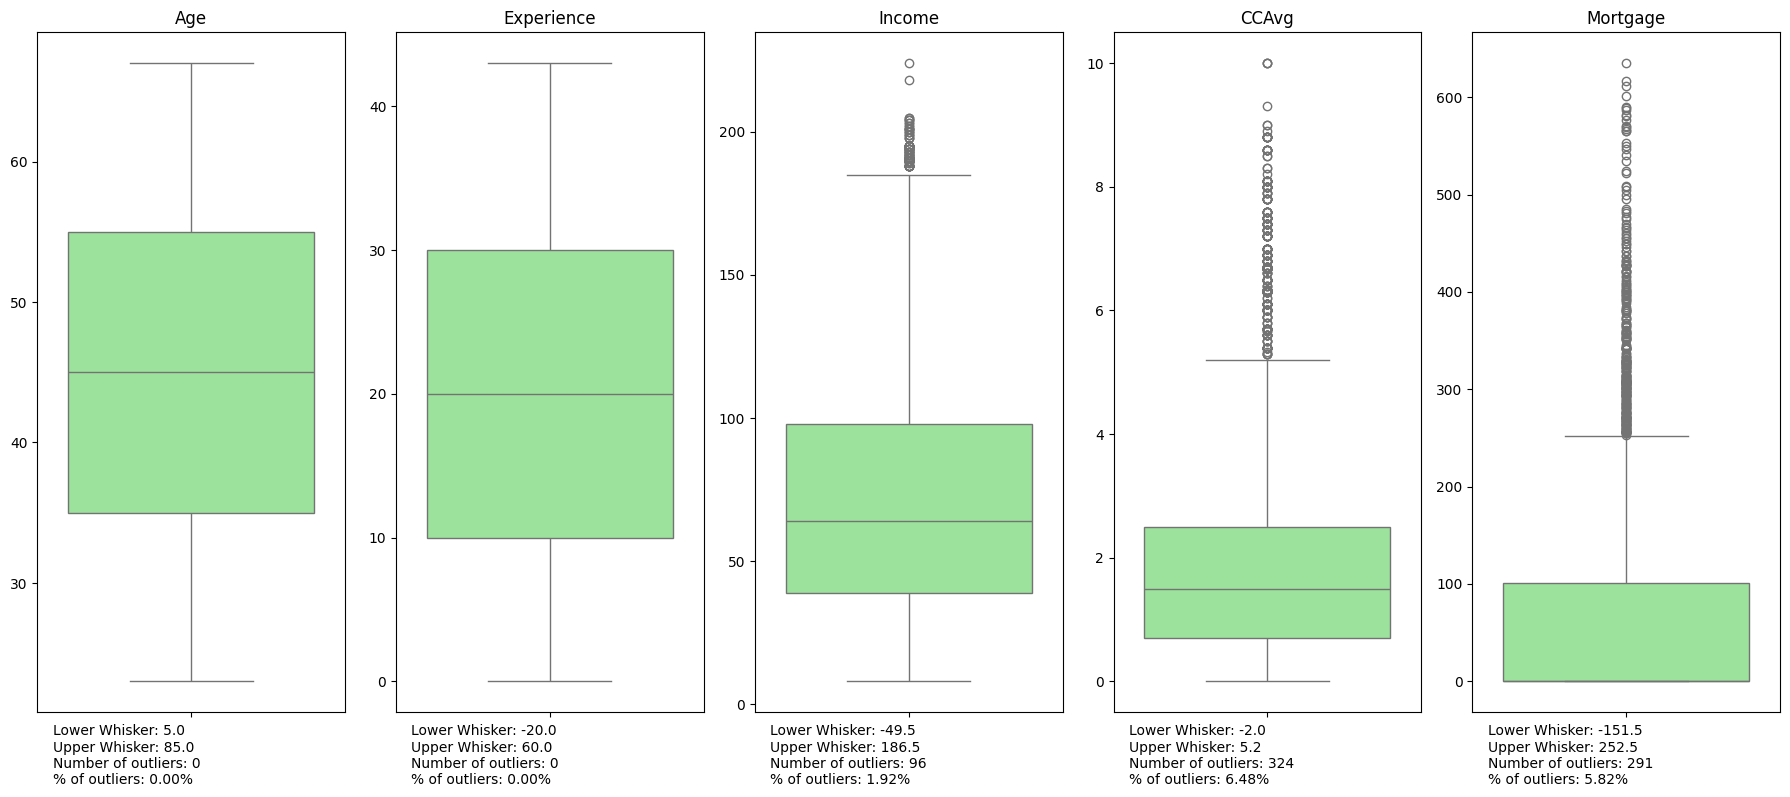

In [ ]:
# Display Boxplot of numerical columns before outlier treatment
display_boxplots(data)


**Observation**:
- There are quite a few outliers in the data as per the below observations.
- However, we will not treat them as they are proper values


## Data preparation for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
# Also drop Mortgage column because we have created a the new Mortgage Holder Column
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

# Creating dummy variables for categorical features
X = pd.get_dummies(X, drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
# Display the
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 19)
Shape of test set :  (1500, 19)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


**Observation**: We have a well balanced classes of the dependent variable in both train and test sets

## Model Building

### Model Evaluation Criterion

The model's predictions may be incorrect in two ways:

1.  **False Positrive**: Predicting that a customer will borrow a personal loan when, in reality, they don't.
2.  **False Negative**: Predicting that a customer will not borrow a personal loan when, in reality, they do.

**Prediction Focus**:
Our primary concern is the second prediction, as AllLife Bank aims to expand its loan business, and every customer who borrows a personal loan is crucial. Therefore, minimizing mistakes in the second prediction (i.e., False Negatives) is of utmost importance.

**Reducing False Negatives**:
To reduce False Negatives, we should aim to maximize the Recall score. A higher Recall score indicates a greater ability to predict potential customers who will borrow a personal loan.

### Define useful functions

First, let's create functions to calculate different metrics and confusion matrix and a function to display Desicion Tree so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.
* The Display_Decition_Tree will be used to represent the Tree Graphically

In [ ]:
# function to plot the confusion_matrix
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    caption = ["True Negative (TN)",
                      "False Positive (FP)\n Type I Error",
                      "False Negative (FN) \n Type II Error",
                      "True Positive (TP)",
               ]

    # predicting using the independent variables
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)   # build the Confusion Matrix

    labels = np.asarray(                    # define the lebels for the Matrix
        [
            ["{0:0.0f}\n".format(item) + "{0:.2%}\n".format(item / cm.flatten().sum()) + caption[index]]
            for index, item in enumerate(cm.flatten())
        ]
    ).reshape(2, 2)

    # Display the confusion Matrix
    plt.figure(figsize=(8, 6))                                          # set the figure size
    sns.heatmap(cm, annot = labels, fmt="", annot_kws={"size": 12})     # plot the confusion matrix
    plt.ylabel("Actual Values", fontsize = 15)                          # set the y-axis label
    plt.xlabel("Predicted Values", fontsize = 15)                       # set the x-axis label
    plt.xticks([0.5, 1.5], ['Negative', 'Positive'])                    # set the x-axis tick labels
    plt.yticks([0.5, 1.5], ['Negative', 'Positive'], rotation=90)       # set the y-axis tick labels
    plt.show()                                                          # show the plot

In [ ]:
# Function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target,
                                             Title = None,
                                             Set = None):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0] if Title == None else [Title],
    )

    return df_perf

In [ ]:
# Build a display for Decision Tree
def Display_Decision_Tree(model, set, figsize):
  plt.figure(figsize = figsize)
  plt.title("Decision Tree")
  plt.tight_layout()

  # Extract feature names from the training set
  feature_names = list(set.columns)

  # plot the decision tree
  out = tree.plot_tree(model, feature_names = feature_names, filled=True, fontsize=9, node_ids=False, class_names=None)

  # below code will add arrows to the decision tree split if they are missing
  for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
      arrow.set_edgecolor("black")
      arrow.set_linewidth(1)

  plt.show()  # Display the decision tree

### Building Initial Model

#### Build Decision Tree Model

In [ ]:
# Building a Decision Tree using default 'gini' criteria
model = DecisionTreeClassifier(criterion="gini", random_state=1)

# Fitting the model on the training set
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Model Performance Evaluation on Training Set

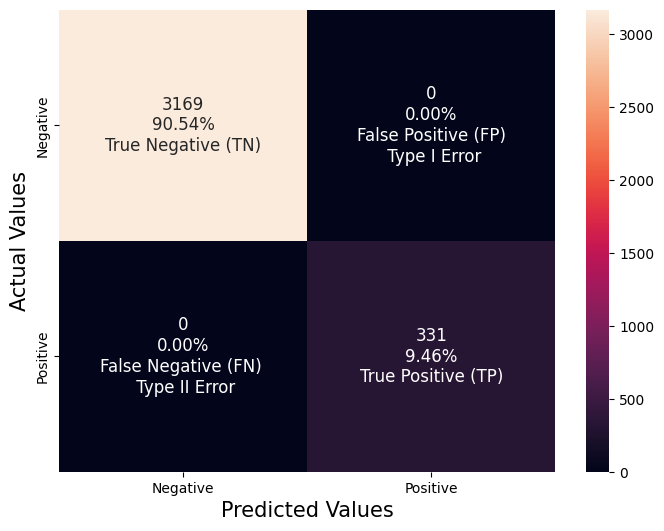

In [ ]:
# Build the Confusion Matrix of Training set to evaluate the Model Performance
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
# Accuracy measures the overall correctness of the model's predictions,
# Precision and Recall focus on the quality of positive and negative predictions, respectively.
# F1 Score provides a balance between Precision and Recall, making it a more comprehensive metric for evaluating classification models
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train, "Decision Tree - Full grown : Training"
)
# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = None
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_perf_train]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_perf_train]
                                                       ).index.duplicated(keep='last')]

decision_tree_perf_train

Accuracy  Recall  Precision  F1 Score
Decision Tree - Full grown : Training       1.0     1.0        1.0       1.0

#### Model Performance Evaluation on Testing Set

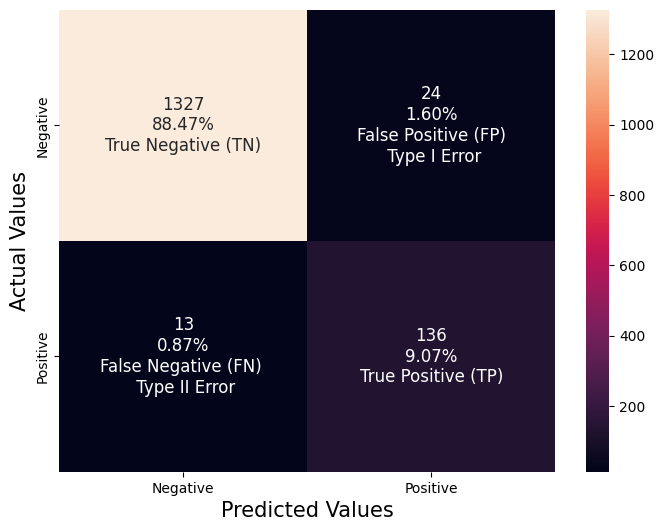

In [ ]:
# Build the Confusion Matrix of Testing set to evaluate the Model Performance
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
# Accuracy measures the overall correctness of the model's predictions,
# Precision and Recall focus on the quality of positive and negative predictions, respectively.
# F1 Score provides a balance between Precision and Recall, making it a more comprehensive metric for evaluating classification models
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test, "Decision Tree - Full grown : Testing"
)
# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_perf_test]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_perf_test]
                                                       ).index.duplicated(keep='last')]

decision_tree_perf_test

Accuracy    Recall  Precision  F1 Score
Decision Tree - Full grown : Testing  0.975333  0.912752       0.85  0.880259

#### **Observation**:
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.
* This initial decision tree has reached its maximum complexity (fully grown), indicating that the model is overfit. As a result, it can accurately classify all data points in the Training Set without making any errors but can't do the same on Testing Set

#### Visualizing the Decision Tree

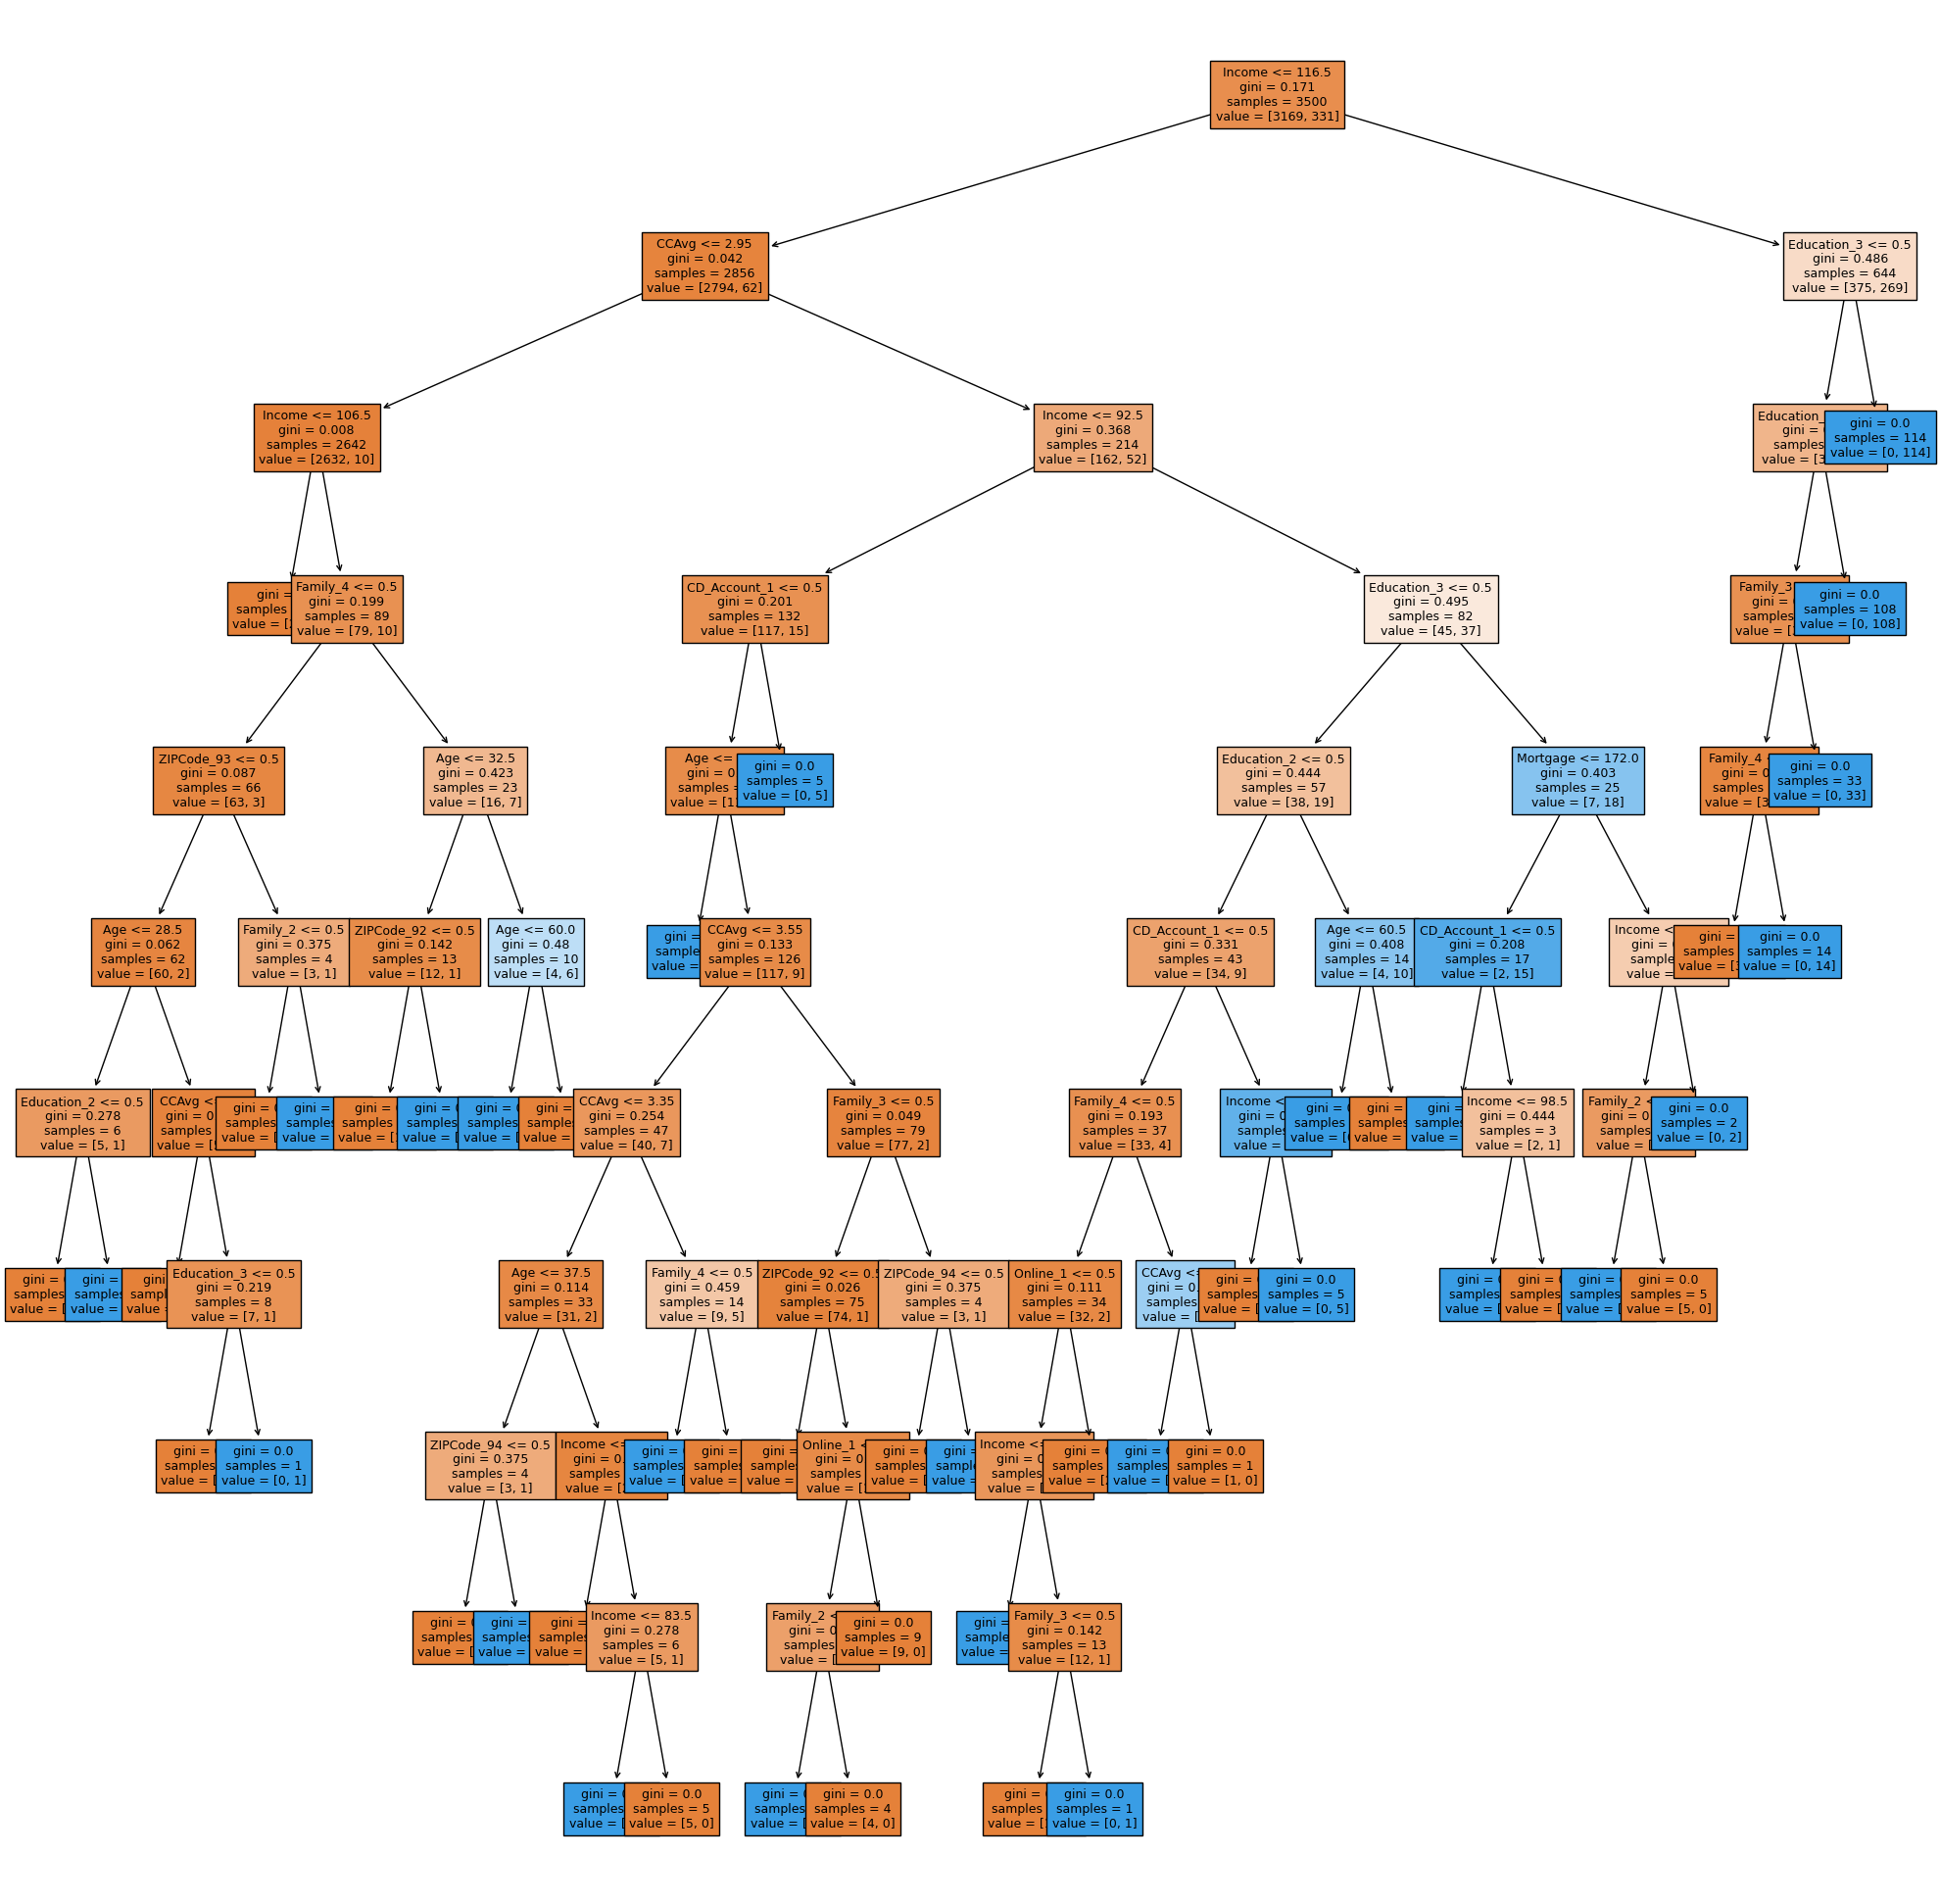

In [ ]:
# Display the Decision Tree by calling the Display_Decision_Tree() function defined earlier
Display_Decision_Tree(model, X_train, figsize=(20, 20))

In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Family_2 <

**Observation**: The tree shown above is fully grown, making it complex and challenging to interpret

#### Evaluate Gini importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
Income                0.312158
Education_2           0.238344
Education_3           0.168309
Family_3              0.098116
Family_4              0.062971
CCAvg                 0.044765
Age                   0.026501
CD_Account_1          0.026348
Family_2              0.007952
ZIPCode_94            0.005005
Mortgage              0.004672
ZIPCode_92            0.003274
Online_1              0.000990
ZIPCode_93            0.000594
Securities_Account_1  0.000000
ZIPCode_96            0.000000
ZIPCode_95            0.000000
ZIPCode_91            0.000000
CreditCard_1          0.000000


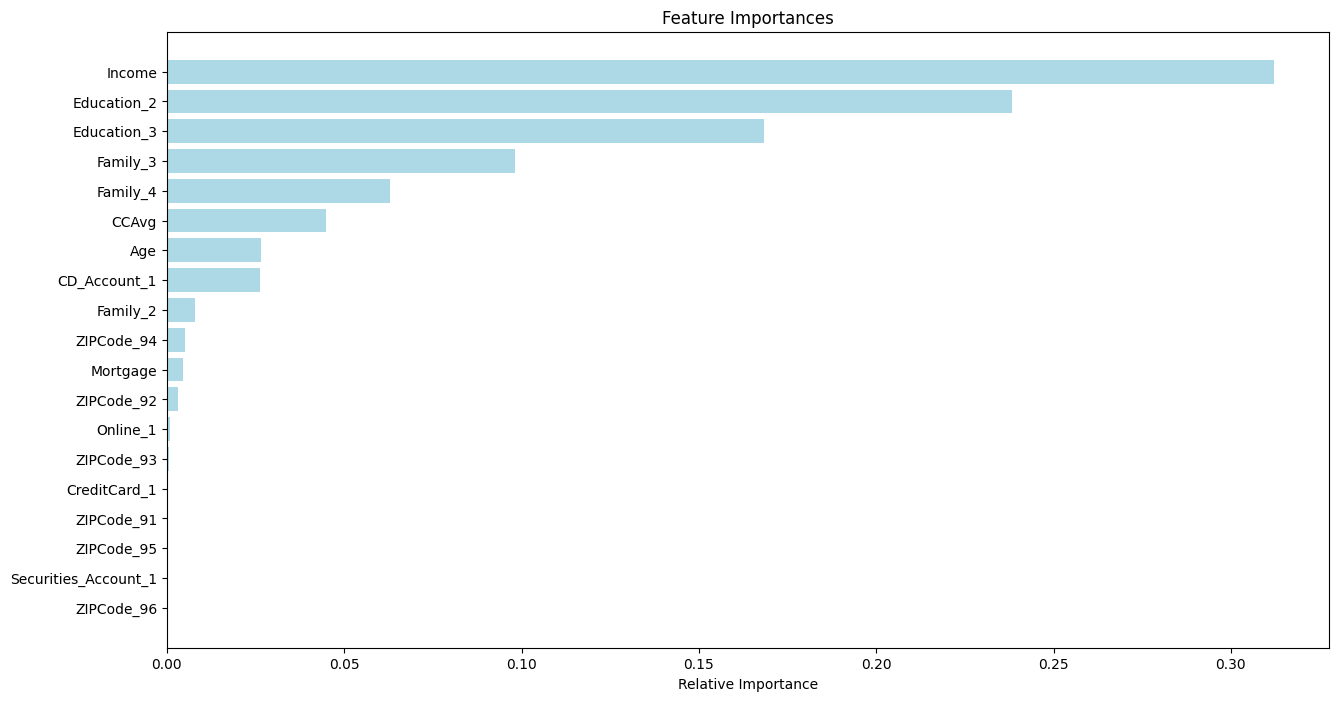

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **Observation**: Based on the decision tree model, Income amd Family Memebers emerges as the most important variable for predicting whether a customer will opt for a Personal Loan

## Model Performance Improvement

### Decision Tree (Pre-pruning)
**Using GridSearch for Hyperparameter tuning of our tree model**

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

#### Build Decision Tree Model

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1,  class_weight={0:.15,1:.85})

# Grid of Hyperparameters to choose from
parameters = {
    "max_depth": np.arange(3, 10),
    'criterion': ['gini','entropy'],
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring = acc_scorer, cv = 5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, max_depth=3,
                       max_leaf_nodes=3, random_state=1)

In [ ]:
# Check parameters of the model best fit using GridSearchCV
pd.DataFrame(estimator.get_params(), index=["Decision Tree (Prepuned)"])

ccp_alpha  class_weight criterion  max_depth  \
Decision Tree (Prepuned)        0.0           NaN      gini          3   

                         max_features  max_leaf_nodes  min_impurity_decrease  \
Decision Tree (Prepuned)         None               3                    0.0   

                          min_samples_leaf  min_samples_split  \
Decision Tree (Prepuned)                 1                  2   

                          min_weight_fraction_leaf  random_state splitter  
Decision Tree (Prepuned)                       0.0             1     best

#### Checking performance on Training Set

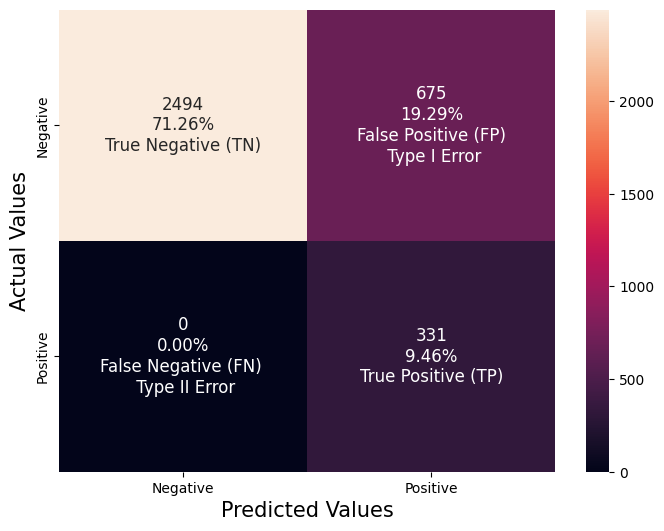

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train)

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train, "Decision Tree - Pre-Pruned : Training"
)

# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_train]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_train]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_perf_train

Accuracy  Recall  Precision  F1 Score
Decision Tree - Pre-Pruned : Training  0.807143     1.0   0.329026  0.495138

#### Checking performance on Testing Set

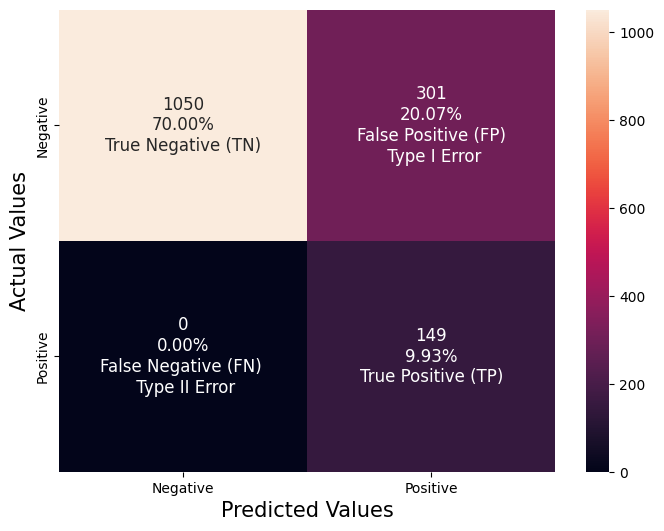

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test, "Decision Tree - Pre-Pruned : Testing"
)

# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_test]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_perf_test]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_perf_test

Accuracy  Recall  Precision  F1 Score
Decision Tree - Pre-Pruned : Testing  0.799333     1.0   0.331111  0.497496

In [ ]:
# Compare the performance parameter of both the initial and pre-pruned models
decision_tree_perf_matrix.sort_index()

Accuracy    Recall  Precision  F1 Score
Decision Tree - Full grown : Testing   0.975333  0.912752   0.850000  0.880259
Decision Tree - Full grown : Training  1.000000  1.000000   1.000000  1.000000
Decision Tree - Pre-Pruned : Testing   0.799333  1.000000   0.331111  0.497496
Decision Tree - Pre-Pruned : Training  0.807143  1.000000   0.329026  0.495138

#### **Observation**:
After pre-pruning a decision tree, the following changes were observed:

 - The Recall on both training sets was perfectly set to 1, indicating zero False Negatives (Type II error) count.
 - However, the Accuracy for both the Testing and Training datasets decreased significantly, resulting in a higher percentage of False Positives (Type I Error).
In line with the model evaluation criteria focused on reducing Type II errors, the decision to pre-prune the tree resulted in optimal Recall but also led to a decrease in Accuracy. This trade-off underscores the importance for AllLife Bank to expand its loan business, where every customer who borrows a personal loan is crucial. Therefore, minimizing mistakes in the second prediction (i.e., False Negatives) is of utmost importance.

#### Visualizing the Decision Tree

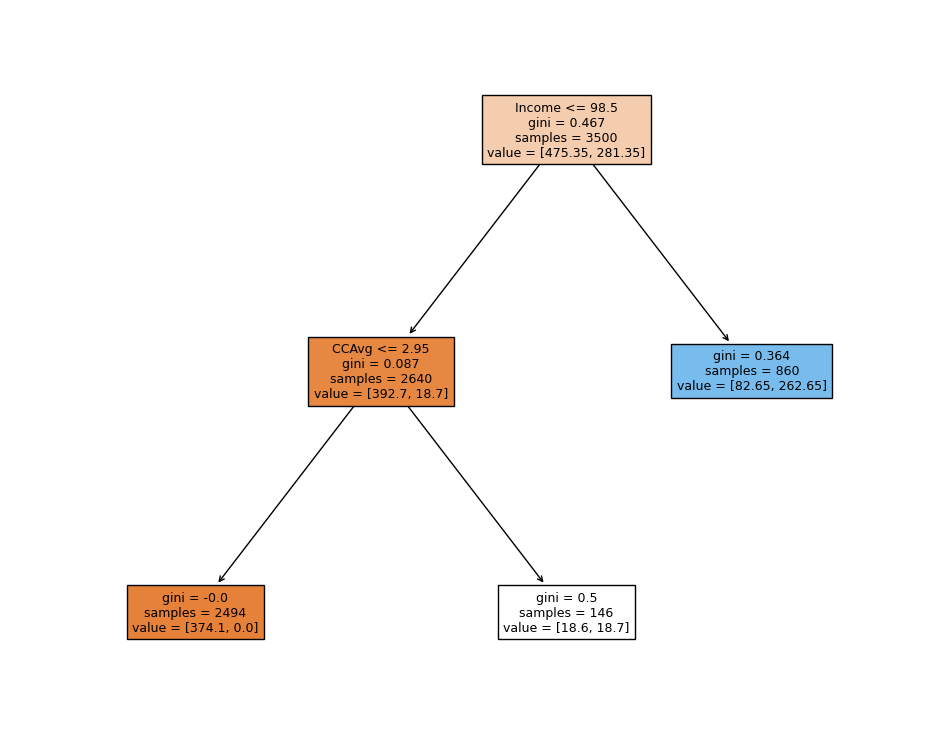

In [ ]:
# Display the Decision Tree by calling the Display_Decision_Tree() function defined earlier
Display_Decision_Tree(estimator, X_train, figsize=(10, 8))

In [ ]:
# Test report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names = feature_names, show_weights = True))

#### **Observation**: We obtain a simplified tree after pre-pruning, ensuring a more generic model

#### Evaluate Gini importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
Income                0.918458
CCAvg                 0.081542
Age                   0.000000
Family_3              0.000000
Online_1              0.000000
CD_Account_1          0.000000
Securities_Account_1  0.000000
Education_3           0.000000
Education_2           0.000000
Family_4              0.000000
ZIPCode_96            0.000000
Family_2              0.000000
ZIPCode_95            0.000000
ZIPCode_94            0.000000
ZIPCode_93            0.000000
ZIPCode_92            0.000000
ZIPCode_91            0.000000
Mortgage              0.000000
CreditCard_1          0.000000


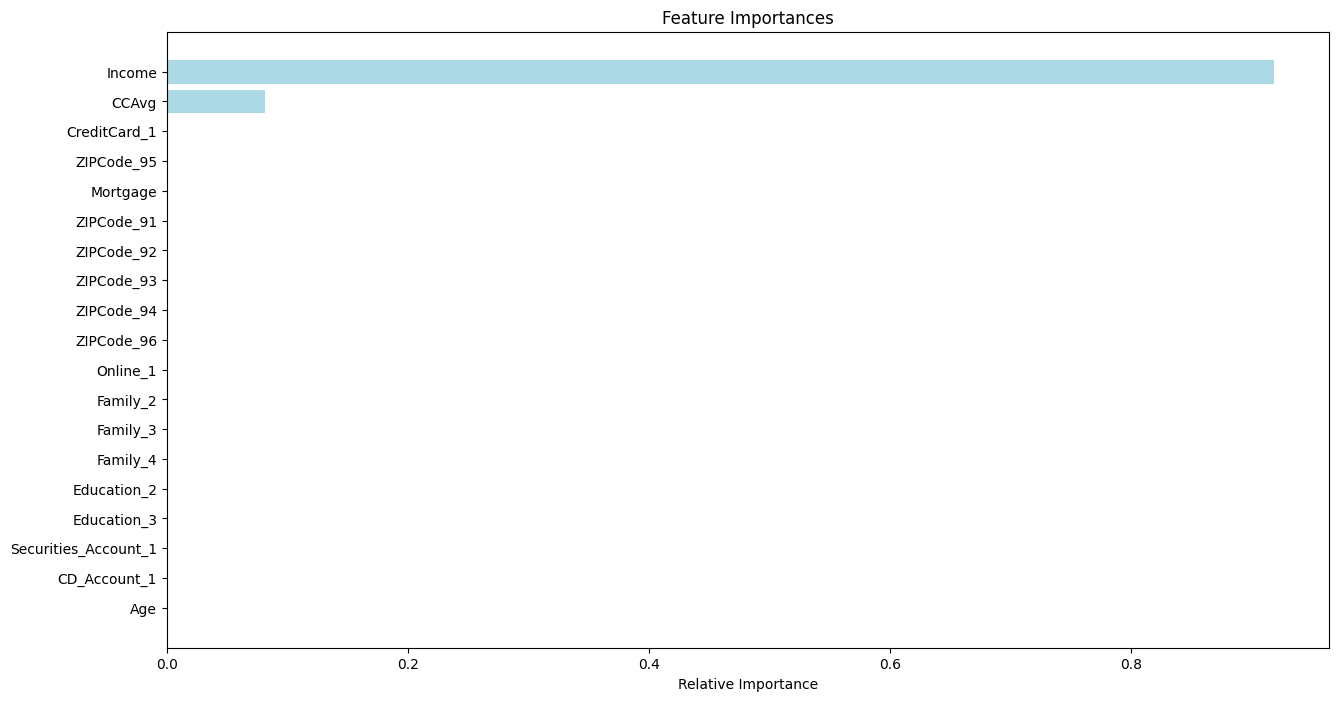

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **Observation**:
 - In the pre tuned decision tree also, Income is the most important features
 - Number of Dependent variables decrease because the Tree is much Simplier

### Cost Complexity Pruning

The `DecisionTreeClassifier` provides parameters such as
``min_samples_leaf`` and ``max_depth`` to prevent a tree from overfiting. Cost
complexity pruning provides another option to control the size of a tree. In
`DecisionTreeClassifier`, this pruning technique is parameterized by the
cost complexity parameter, ``ccp_alpha``. Greater values of ``ccp_alpha``
increase the number of nodes pruned. Here we only show the effect of
``ccp_alpha`` on regularizing the trees and how to choose a ``ccp_alpha``
based on validation scores.

### Total impurity of leaves vs effective alphas of pruned tree

Minimal cost complexity pruning recursively identifies the node with the "weakest link." This is determined by an effective alpha, where nodes with the smallest effective alpha are pruned first. To determine suitable values for ``ccp_alpha``, scikit-learn offers `DecisionTreeClassifier.cost_complexity_pruning_path`, providing effective alphas and the corresponding total leaf impurities at each pruning step. As alpha increases, more of the tree is pruned, resulting in higher total impurity of its leaves.

#### Build Decition Tree Model

In [ ]:
clf = DecisionTreeClassifier(random_state=1, class_weight = {0:0.15, 1:0.85})  # Creates a decision tree classifier with a fixed random state
path = clf.cost_complexity_pruning_path(X_train, y_train)       # Calculates pruning alphas based on training data
ccp_alphas, impurities = path.ccp_alphas, path.impurities       # Stores pruning alphas and corresponding impurities for decision tree pruning

In [ ]:
# Print the impurities of Effective Alpha
print(f"Impurities of Effective Alpha:\n")
pd.DataFrame(path)

Impurities of Effective Alpha:



ccp_alphas    impurities
0   0.000000e+00 -8.130260e-15
1   1.320471e-19 -8.130128e-15
2   1.320471e-19 -8.129996e-15
3   1.320471e-19 -8.129864e-15
4   7.482671e-19 -8.129115e-15
5   7.482671e-19 -8.128367e-15
6   1.760629e-18 -8.126607e-15
7   1.760629e-18 -8.124846e-15
8   2.288817e-18 -8.122557e-15
9   2.332833e-18 -8.120224e-15
10  2.494224e-18 -8.117730e-15
11  2.905037e-18 -8.114825e-15
12  4.665666e-18 -8.110159e-15
13  4.665666e-18 -8.105494e-15
14  5.854090e-18 -8.099640e-15
15  7.218577e-18 -8.092421e-15
16  9.478050e-18 -8.082943e-15
17  1.143528e-16 -7.968590e-15
18  4.407293e-16 -7.527861e-15
19  3.369896e-04  3.369896e-04
20  3.643130e-04  7.013026e-04
21  3.685823e-04  1.807050e-03
22  3.744328e-04  2.181482e-03
23  3.744328e-04  2.555915e-03
24  3.797065e-04  4.074741e-03
25  3.829427e-04  4.457684e-03
26  3.879017e-04  4.845586e-03
27  3.905508e-04  6.017238e-03
28  3.928099e-04  6.410048e-03
29  5.860688e-04  6.996117e-03
30  6.546462e-04  7.650763e-03
31  6.554717e-04  8.306235e-03
32  6.758139e-04  8.982049e-03
33  6.925559e-04  9.674605e-03
34  7.122771e-04  1.038688e-02
35  7.776682e-04  1.116455e-02
36  8.174649e-04  1.525187e-02
37  8.789656e-04  1.613084e-02
38  9.095010e-04  1.704034e-02
39  9.404360e-04  1.798078e-02
40  9.407728e-04  1.986232e-02
41  1.011155e-03  2.087348e-02
42  1.013173e-03  2.188665e-02
43  1.018946e-03  2.290560e-02
44  1.157338e-03  2.406293e-02
45  1.212606e-03  2.527554e-02
46  1.399934e-03  2.667547e-02
47  1.512006e-03  2.818748e-02
48  1.612806e-03  2.980029e-02
49  1.638043e-03  3.143833e-02
50  2.602631e-03  3.404096e-02
51  2.742431e-03  3.678339e-02
52  3.335999e-03  4.011939e-02
53  3.409906e-03  4.352930e-02
54  3.527226e-03  4.705652e-02
55  4.797122e-03  5.665076e-02
56  5.138280e-03  6.178904e-02
57  6.725814e-03  6.851486e-02
58  2.253222e-02  9.104708e-02
59  3.057320e-02  2.133399e-01
60  2.537957e-01  4.671356e-01

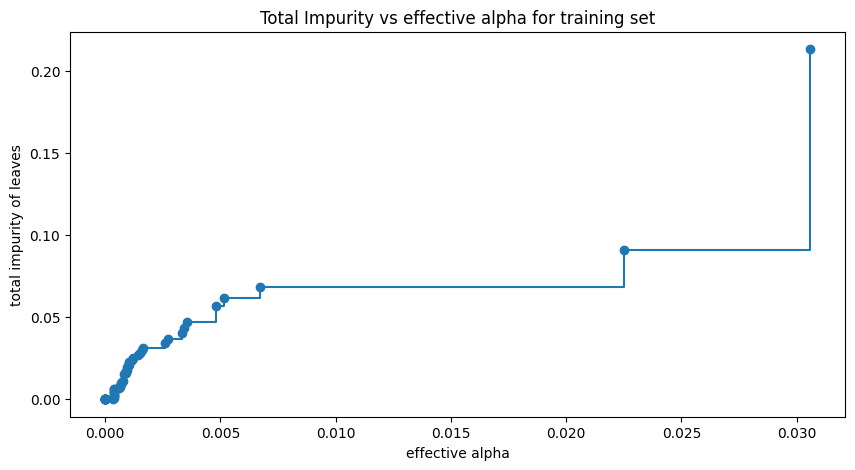

In [ ]:
# Plot Total Impurity against alpha for the training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [ ]:
# Training the decision tree using the effective alphas
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state = 1, ccp_alpha = ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

print(
    "Number of nodes in the last tree is : {} with ccp_alpha : {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is : 1 with ccp_alpha : 0.25379571489481034


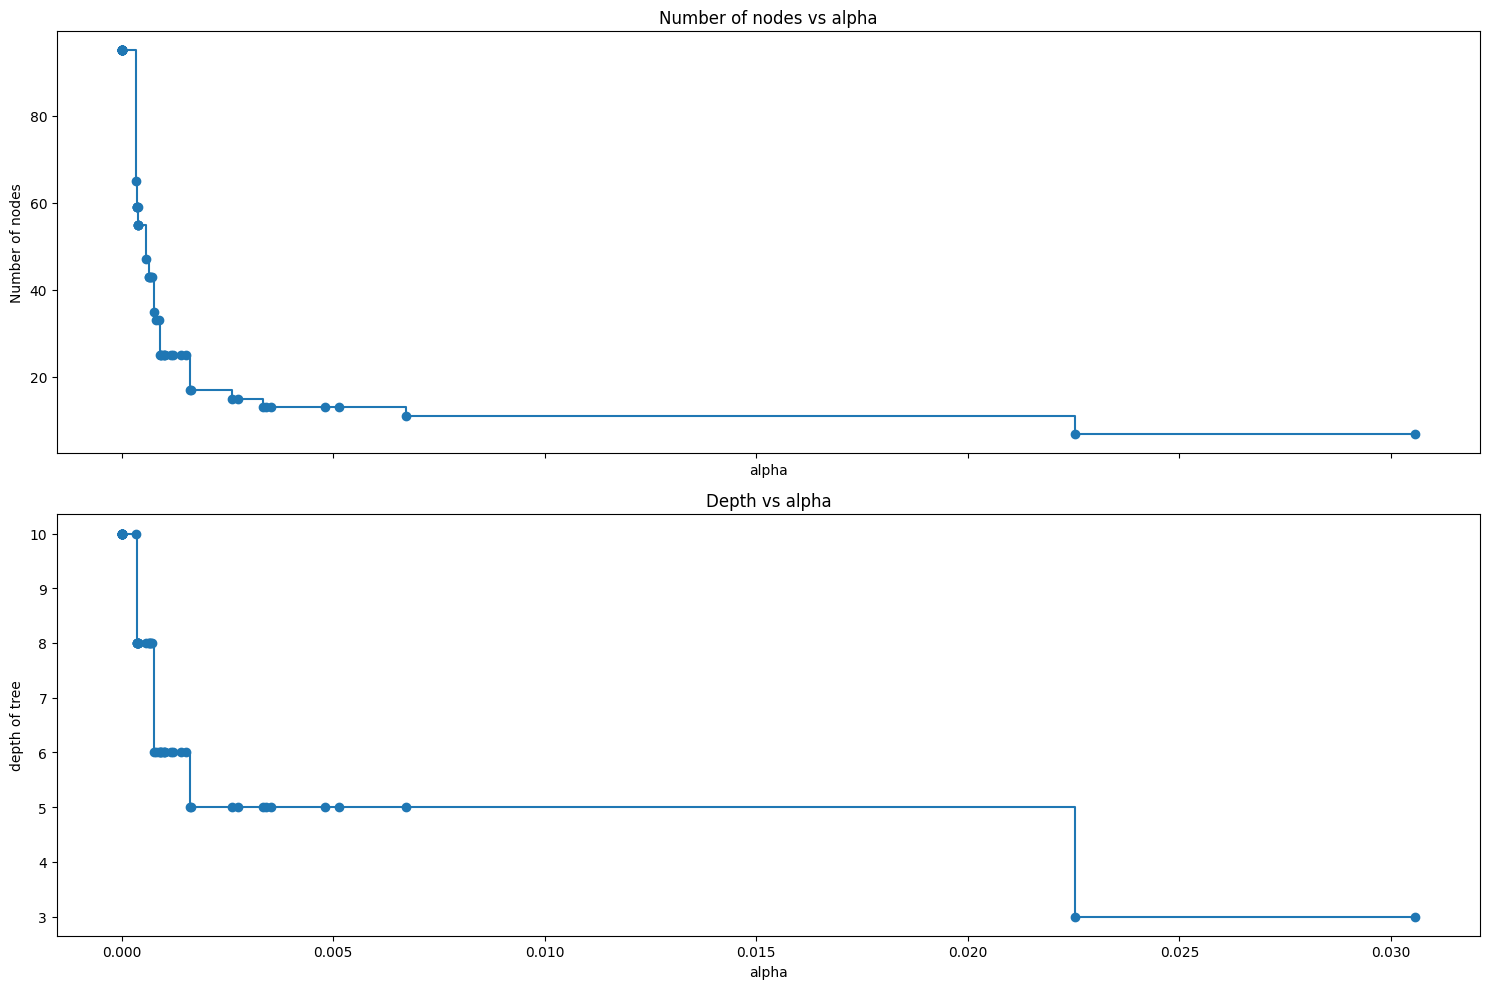

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs alpha")

ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")

fig.tight_layout()
plt.show()

##### **Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []

for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [ ]:
recall_test = []

for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

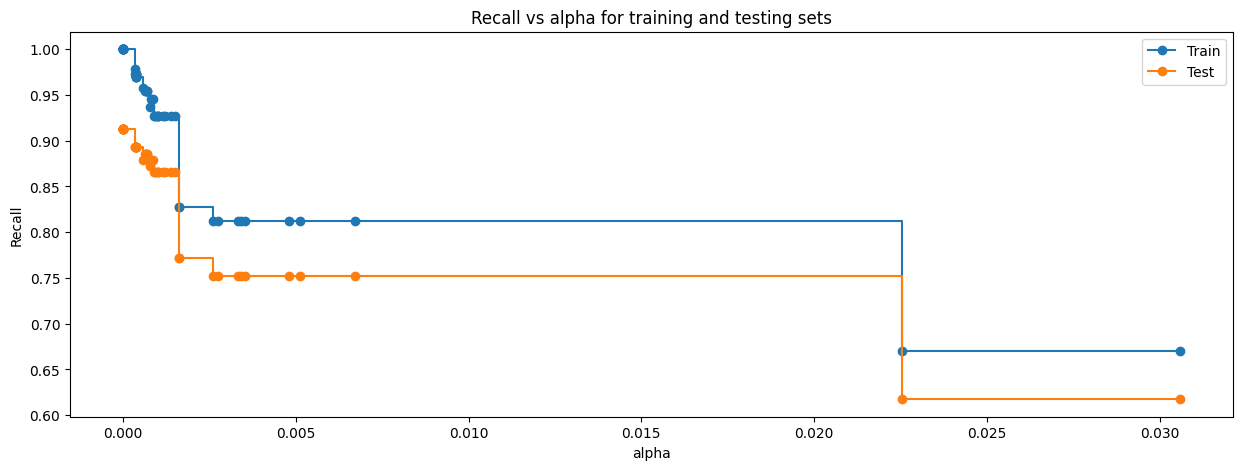

In [ ]:
# Compare the Recall vs alpha for training and testing sets on a plot
fig, ax = plt.subplots(figsize=(15, 5))

ax.set_xlabel("alpha")
ax.set_ylabel("Recall")

ax.set_title("Recall vs alpha for training and testing sets")

ax.plot(ccp_alphas, recall_train, marker="o", label="Train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="Test", drawstyle="steps-post")
ax.legend()
plt.show()

**Observation**: The maximum value of Recall is when Alpha is Zero, for both train and test sets

In [ ]:
# # Creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model.ccp_alpha)

0.0


In [ ]:
best_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking performance on Training Set

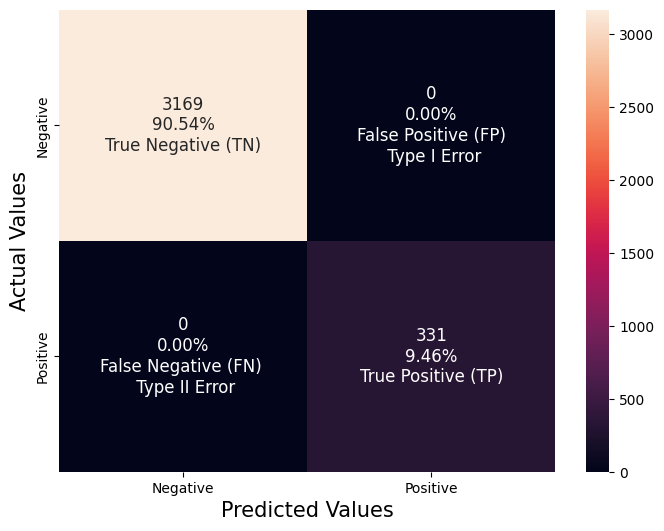

In [ ]:
confusion_matrix_sklearn(best_model, X_train, y_train)

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(
    best_model, X_train, y_train, "Decision Tree - Post-Pruned : Training"
)

# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_train]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_train]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_post_train

Accuracy  Recall  Precision  F1 Score
Decision Tree - Post-Pruned : Training       1.0     1.0        1.0       1.0

#### Checking performance on Testing Set

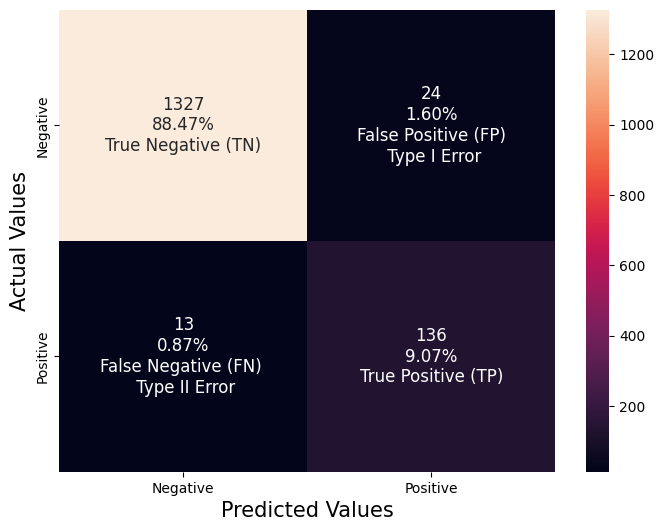

In [ ]:
confusion_matrix_sklearn(best_model, X_test, y_test)

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(
    best_model, X_test, y_test, "Decision Tree - Post-Pruned : Testing"
)

# Append the performance matrix of this Tree to amother Matrix to compare the performanc in future
decision_tree_perf_matrix = pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_test]
                                      ).loc[~pd.concat([decision_tree_perf_matrix, decision_tree_tune_post_test]
                                                       ).index.duplicated(keep='last')]
decision_tree_tune_post_test

Accuracy    Recall  Precision  F1 Score
Decision Tree - Post-Pruned : Testing  0.975333  0.912752       0.85  0.880259

In [ ]:
# Compare the performance parameter of both the initial and pre-pruned models
decision_tree_perf_matrix.sort_index()

Accuracy    Recall  Precision  \
Decision Tree - Full grown : Testing    0.975333  0.912752   0.850000   
Decision Tree - Full grown : Training   1.000000  1.000000   1.000000   
Decision Tree - Pose-Pruned : Training  1.000000  1.000000   1.000000   
Decision Tree - Post-Pruned : Testing   0.975333  0.912752   0.850000   
Decision Tree - Pre-Pruned : Testing    0.799333  1.000000   0.331111   
Decision Tree - Pre-Pruned : Training   0.807143  1.000000   0.329026   

                                        F1 Score  
Decision Tree - Full grown : Testing    0.880259  
Decision Tree - Full grown : Training   1.000000  
Decision Tree - Pose-Pruned : Training  1.000000  
Decision Tree - Post-Pruned : Testing   0.880259  
Decision Tree - Pre-Pruned : Testing    0.497496  
Decision Tree - Pre-Pruned : Training   0.495138

#### Visualizing the Decision Tree

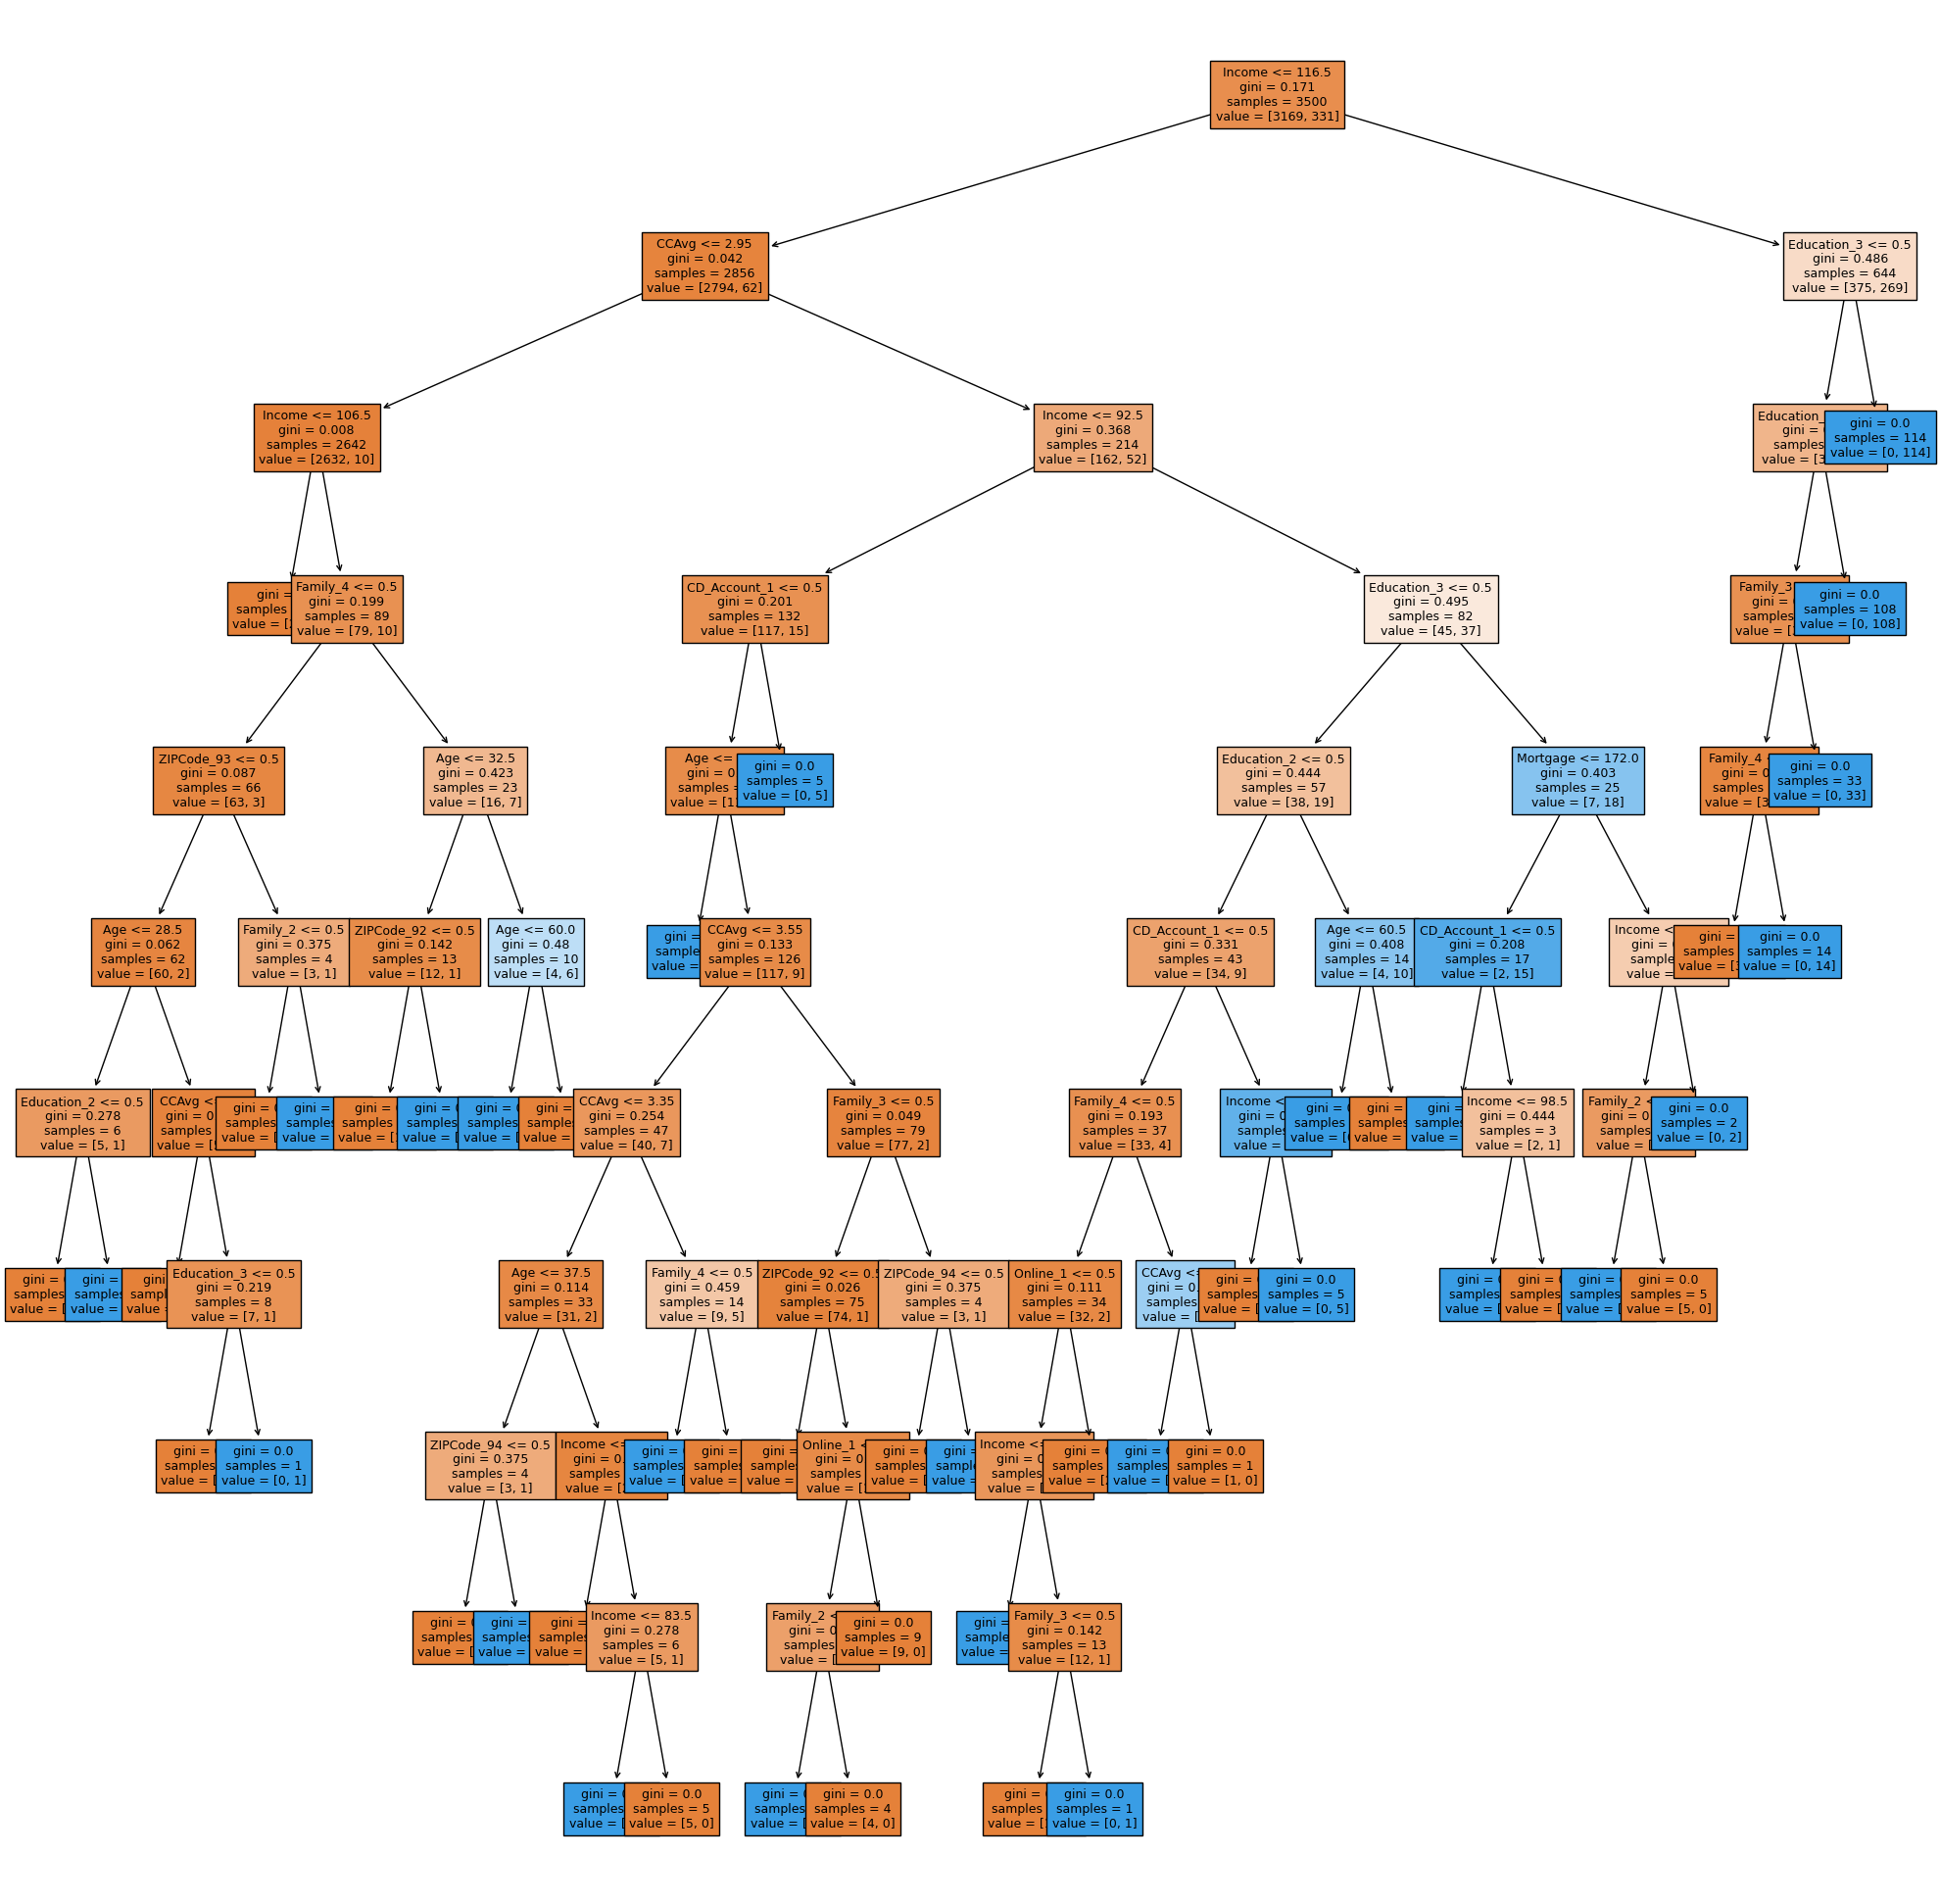

In [ ]:
# Display the Decision Tree by calling the Display_Decision_Tree() function defined earlier
Display_Decision_Tree(best_model, X_train, figsize=(20, 20))

#### Evaluate Gini importance

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                           Imp
Income                0.312158
Education_2           0.238344
Education_3           0.168309
Family_3              0.098116
Family_4              0.062971
CCAvg                 0.044765
Age                   0.026501
CD_Account_1          0.026348
Family_2              0.007952
ZIPCode_94            0.005005
Mortgage              0.004672
ZIPCode_92            0.003274
Online_1              0.000990
ZIPCode_93            0.000594
Securities_Account_1  0.000000
ZIPCode_96            0.000000
ZIPCode_95            0.000000
ZIPCode_91            0.000000
CreditCard_1          0.000000


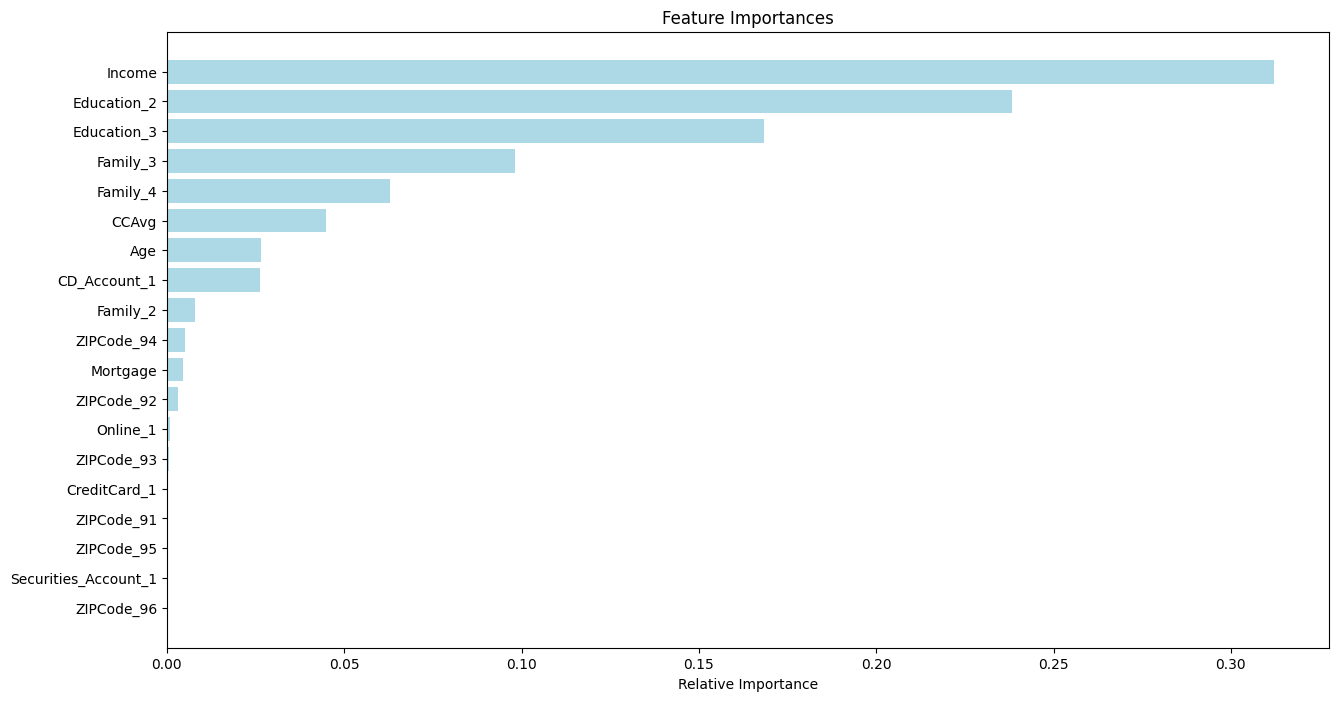

In [ ]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="lightblue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### **Observation**:
 - In the post tuned decision tree also, Income is the most important features

## Model Comparison and Final Model Selection

In [ ]:
# Training performance comparison
# search for rows in the pre-built DataFrame decision_tree_perf_matrix where the index contains the word "Train"
decision_tree_perf_matrix.loc[decision_tree_perf_matrix.index.str.contains("Train")]

Accuracy  Recall  Precision  F1 Score
Decision Tree - Full grown : Training   1.000000     1.0   1.000000  1.000000
Decision Tree - Pre-Pruned : Training   0.807143     1.0   0.329026  0.495138
Decision Tree - Pose-Pruned : Training  1.000000     1.0   1.000000  1.000000
Decision Tree - Post-Pruned : Training  1.000000     1.0   1.000000  1.000000

In [ ]:
# Testing performance comparison
# search for rows in the pre-built DataFrame decision_tree_perf_matrix where the index contains the word "Test"
decision_tree_perf_matrix.loc[decision_tree_perf_matrix.index.str.contains("Test")]

Accuracy    Recall  Precision  F1 Score
Decision Tree - Full grown : Testing   0.975333  0.912752   0.850000  0.880259
Decision Tree - Pre-Pruned : Testing   0.799333  1.000000   0.331111  0.497496
Decision Tree - Post-Pruned : Testing  0.975333  0.912752   0.850000  0.880259

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___